<a href="https://colab.research.google.com/github/minaduranovic/vis-23/blob/main/vis_23_z2_tim4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/minaduranovic/vis-23

fatal: destination path 'vis-23' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency
import plotly.express as px
import seaborn as sns
import statsmodels.stats.proportion as smp
import statsmodels.api as sm
import matplotlib.cm as cm
import statsmodels.stats.proportion as prop
from scipy.stats import binom
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import pylab
from scipy.stats import lognorm
from scipy.stats import kstest
from sklearn.metrics import mean_squared_error
from itertools import combinations

import plotly.graph_objects as go

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('vis-23/astronauts.csv')
print(df.head(10))

   id  number  nationwide_number                     name  \
0   1       1                  1            Gagarin, Yuri   
1   2       2                  2           Titov, Gherman   
2   3       3                  1      Glenn, John H., Jr.   
3   4       3                  1      Glenn, John H., Jr.   
4   5       4                  2      Carpenter, M. Scott   
5   6       5                  2      Nikolayev, Andriyan   
6   7       5                  2      Nikolayev, Andriyan   
7   8       6                  4          Popovich, Pavel   
8   9       6                  4          Popovich, Pavel   
9  10       7                  3  Schirra, Walter M., Jr.   

                  original_name   sex  year_of_birth     nationality  \
0       ГАГАРИН Юрий Алексеевич  male           1934  U.S.S.R/Russia   
1       ТИТОВ Герман Степанович  male           1935  U.S.S.R/Russia   
2           Glenn, John H., Jr.  male           1921            U.S.   
3           Glenn, John H., Jr.  male   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1272 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1272 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 14  year_of_

In [ ]:
df.describe(include="all")

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
count,1277.000000,1277.000000,1277.000000,1277,1272,1277,1277.000000,1277,1277,1272,...,1277.000000,1276,1276,1277,1276,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
unique,NaN,NaN,NaN,564,560,2,NaN,40,2,228,...,NaN,361,436,289,432,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Chang-Diaz, Franklin R.","Chang-Diaz, Franklin R.",male,NaN,U.S.,military,NASA- 16,...,NaN,Salyut 7,STS-42,ISS,STS-42,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,7,7,1134,NaN,854,769,51,...,NaN,24,8,174,8,NaN,NaN,NaN,NaN,NaN
mean,639.000000,274.233359,128.754111,NaN,NaN,NaN,1951.683634,NaN,NaN,NaN,...,1994.597494,NaN,NaN,NaN,NaN,1050.883984,2968.341410,0.628818,3.661287,10.761410
std,368.782456,148.185389,97.263590,NaN,NaN,NaN,11.435117,NaN,NaN,NaN,...,12.583237,NaN,NaN,NaN,NaN,1714.791959,4214.715104,1.165753,7.287245,16.045247
min,1.000000,1.000000,1.000000,NaN,NaN,NaN,1921.000000,NaN,NaN,NaN,...,1961.000000,NaN,NaN,NaN,NaN,0.000000,0.610000,0.000000,0.000000,0.000000
25%,320.000000,153.000000,47.000000,NaN,NaN,NaN,1944.000000,NaN,NaN,NaN,...,1986.000000,NaN,NaN,NaN,NaN,190.030000,482.000000,0.000000,0.000000,0.000000
50%,639.000000,278.000000,110.000000,NaN,NaN,NaN,1952.000000,NaN,NaN,NaN,...,1995.000000,NaN,NaN,NaN,NaN,261.000000,932.000000,0.000000,0.000000,0.000000
75%,958.000000,390.000000,204.000000,NaN,NaN,NaN,1959.000000,NaN,NaN,NaN,...,2003.000000,NaN,NaN,NaN,NaN,382.000000,4264.000000,1.000000,4.720000,19.520000


In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

num_numerical_columns = len(numerical_columns)

print("Broj numeričkih kolona:", num_numerical_columns)
print()
print("Numeričke kolone:", numerical_columns)

numeric_columns = ['id', 'number', 'nationwide_number', 'year_of_birth',
                   'year_of_selection', 'mission_number', 'total_number_of_missions',
                   'year_of_mission', 'hours_mission', 'total_hrs_sum', 'field21',
                   'eva_hrs_mission', 'total_eva_hrs']
print()
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()
    std_value = df[column].std()
    median_value = df[column].median()

    print("Statisitika za kolonu:", column)
    print("Minimum:", min_value)
    print("Maximum:", max_value)
    print("Mean:", mean_value)
    print("Standardna Devijacija:", std_value)
    print("Median:", median_value)
    print()

Broj numeričkih kolona: 13

Numeričke kolone: Index(['id', 'number', 'nationwide_number', 'year_of_birth',
       'year_of_selection', 'mission_number', 'total_number_of_missions',
       'year_of_mission', 'hours_mission', 'total_hrs_sum', 'field21',
       'eva_hrs_mission', 'total_eva_hrs'],
      dtype='object')

Statisitika za kolonu: id
Minimum: 1
Maximum: 1277
Mean: 639.0
Standardna Devijacija: 368.7824561987731
Median: 639.0

Statisitika za kolonu: number
Minimum: 1
Maximum: 565
Mean: 274.23335943617855
Standardna Devijacija: 148.18538878897337
Median: 278.0

Statisitika za kolonu: nationwide_number
Minimum: 1
Maximum: 433
Mean: 128.7541111981206
Standardna Devijacija: 97.26359004783801
Median: 110.0

Statisitika za kolonu: year_of_birth
Minimum: 1921
Maximum: 1983
Mean: 1951.6836335160533
Standardna Devijacija: 11.435117086181286
Median: 1952.0

Statisitika za kolonu: year_of_selection
Minimum: 1959
Maximum: 2018
Mean: 1985.5888801879405
Standardna Devijacija: 12.2191702159754

In [ ]:
df.head()

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


In [ ]:
sex_count = df['sex'].value_counts()
male_count = sex_count['male']
female_count = sex_count['female']
print("Broj astronauta prema polu:")
print("Muškarci:", male_count)
print("Žene:", female_count)
print()

nationality_count = df['nationality'].value_counts()
ussr_russia_count = nationality_count['U.S.S.R/Russia']
us_count = nationality_count['U.S.']
print("Broj astronauta prema nacionalnosti:")
print("U.S.S.R/Russia:", ussr_russia_count)
print("U.S.:", us_count)
print()

prosjecni_sati_po_misiji = df['hours_mission'].mean()
ukupno_sati_svih_misija = df['hours_mission'].sum()
print("Prosjek i ukupan broj sati provedenih na misijama:")
print("Prosjek sati po misiji:", round(prosjecni_sati_po_misiji, 2))
print("Ukupno sati za sve misije:", round(ukupno_sati_svih_misija, 2))
print()

statistika_sati_misija = df['hours_mission'].describe()
print("Opisna statistika za broj sati provedenih na misijama:")
print(statistika_sati_misija)
print()

misije_po_zanimanju = df['occupation'].value_counts()
pilot_misije = misije_po_zanimanju['pilot']
commander_misije = misije_po_zanimanju['commander']

f_misije = misije_po_zanimanju['flight engineer']

print("Ukupan broj misija prema zanimanju:")
print("Pilot:", pilot_misije)
print("Commander:", commander_misije)

print("Inženjer leta:", f_misije)


Broj astronauta prema polu:
Muškarci: 1134
Žene: 143

Broj astronauta prema nacionalnosti:
U.S.S.R/Russia: 273
U.S.: 854

Prosjek i ukupan broj sati provedenih na misijama:
Prosjek sati po misiji: 1050.88
Ukupno sati za sve misije: 1341978.85

Opisna statistika za broj sati provedenih na misijama:
count     1277.000000
mean      1050.883984
std       1714.791959
min          0.000000
25%        190.030000
50%        261.000000
75%        382.000000
max      10505.000000
Name: hours_mission, dtype: float64

Ukupan broj misija prema zanimanju:
Pilot: 196
Commander: 315
Inženjer leta: 192


#Analiza seta podataka

Analiza vrste varijabli u datasetu igra ključnu ulogu u razumijevanju podataka i izvlačenju korisnih informacija. Razumijevanje vrste varijabli koje se nalaze u datasetu omogućava nam dublji uvid u karakteristike podataka i pomaže nam u donošenju informiranih odluka. U ovom istraživanju, fokusiramo se na analizu vrste varijabli u našem datasetu kako bismo stekli jasniju sliku o prirodi podataka i identificirali najrelevantnije aspekte za daljnju analizu.

In [ ]:
print(df.info())

numeric_vars = []
categorical_vars = []
datetime_vars = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_vars.append(column)
    elif df[column].dtype == 'object':
        categorical_vars.append(column)
    elif df[column].dtype == 'datetime64[ns]':
        datetime_vars.append(column)

print("Broj numeričkih varijabli:", len(numeric_vars))
print("Broj kategoričkih varijabli:", len(categorical_vars))
print("Broj vremenskih varijabli:", len(datetime_vars))
print("Numeričke varijable:", numeric_vars)
print("Kategoričke varijable:", categorical_vars)
print("Vremenske varijable:", datetime_vars)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1272 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1272 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 14  year_of_

Postoje različite vrste varijabli koje se mogu pojaviti u datasetu, kao što su numeričke varijable, kategoričke varijable i vremenske serije. Kao što možemo primjetiti, naš dataset se sastoji od 15 numeričkih varijabli i 12 kategoričkih varijabli. Njihovu raspodjelu možemo i vizualizirati:

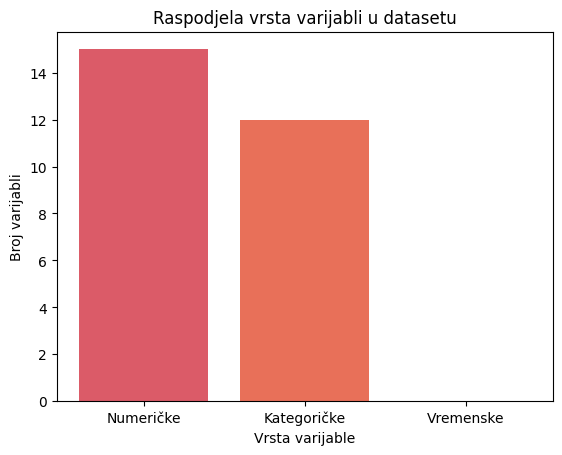

In [ ]:

var_types = {
    'Numeričke': 0,
    'Kategoričke': 0,
    'Vremenske': 0
}

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        var_types['Numeričke'] += 1
    elif df[column].dtype == 'object':
        var_types['Kategoričke'] += 1
    elif df[column].dtype == 'datetime64[ns]':
        var_types['Vremenske'] += 1

labels = var_types.keys()
sizes = var_types.values()

colors = ['#DB5B68', '#E87059', '#F8C045']

plt.bar(labels, sizes, color=colors)

plt.title('Raspodjela vrsta varijabli u datasetu')
plt.xlabel('Vrsta varijable')
plt.ylabel('Broj varijabli')

plt.show()

Dalje možemo analizirati raspodjelu nekih od varijabli koje će nam najčešće trebati.

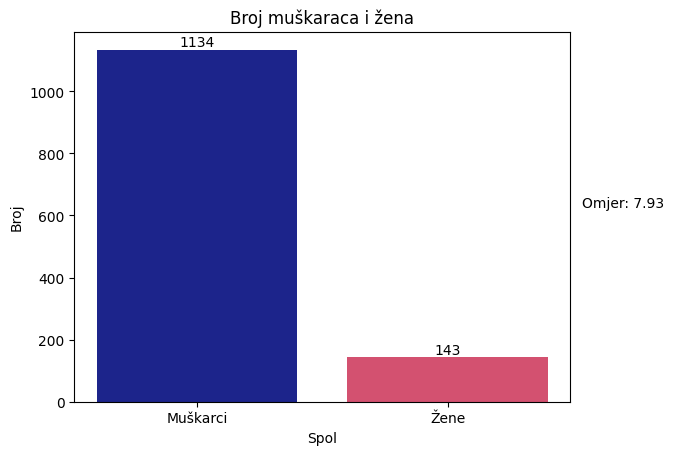

In [ ]:
broj_muskaraca = df[df['sex'] == 'male'].shape[0]
broj_zena = df[df['sex'] == 'female'].shape[0]

omjer = broj_muskaraca / broj_zena

kategorije = ['Muškarci', 'Žene']
broj_osoba = [broj_muskaraca, broj_zena]

boje = ['#1C248B', '#D35170']

plt.bar(kategorije, broj_osoba, color=boje)
plt.title('Broj muškaraca i žena')
plt.xlabel('Spol')
plt.ylabel('Broj')

plt.text(kategorije[0], broj_osoba[0], str(broj_muskaraca), ha='center', va='bottom', color='black')
plt.text(kategorije[1], broj_osoba[1], str(broj_zena), ha='center', va='bottom', color='black')

plt.text(1.7, (broj_osoba[0] + broj_osoba[1]) / 2, f'Omjer: {omjer:.2f}', ha='center', va='center', color='black')

plt.show()


Sa grafika možemo vidjeti da ima ubjedljivo više muškaraca od žena, tačnije **7.93** puta više. Ovakva razlika će se vjerovatno moći vidjeti na mjestima u kojim koristimo ovu varijablu.

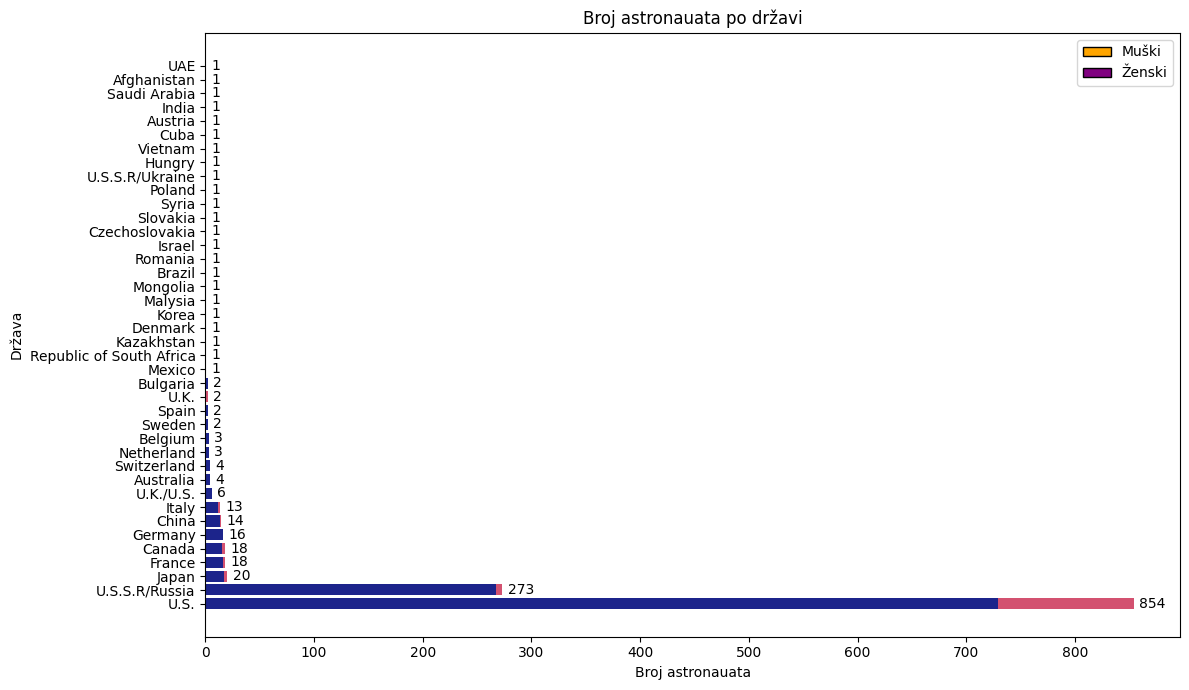

In [ ]:
broj_astronauata_po_drzavi = df['nationality'].value_counts()

broj_astronauata_po_drzavi_spol = df.groupby(['nationality', 'sex']).size().unstack()

cmap = cm.plasma

fig, ax = plt.subplots(figsize=(12, 7))
colors = cmap(range(len(broj_astronauata_po_drzavi)))
y_pos = np.arange(len(broj_astronauata_po_drzavi))
bars = plt.barh(y_pos, broj_astronauata_po_drzavi.values, color=colors)

for i, bar in enumerate(bars):
    drzava = broj_astronauata_po_drzavi.index[i]
    broj_muskih = broj_astronauata_po_drzavi_spol.loc[drzava, 'male']
    broj_zenskih = broj_astronauata_po_drzavi_spol.loc[drzava, 'female']
    ax.barh(y_pos[i], broj_muskih, color='#1C248B', label='Muški' if i == 0 else None)
    ax.barh(y_pos[i], broj_zenskih, left=broj_muskih, color='#D35170', label='Ženski' if i == 0 else None)

plt.title('Broj astronauata po državi')
plt.xlabel('Broj astronauata')
plt.ylabel('Država')

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.yticks(y_pos, broj_astronauata_po_drzavi.index)

custom_labels = [plt.Rectangle((0, 0), 1, 1, color='orange', ec='black', lw=1),
                 plt.Rectangle((0, 0), 1, 1, color='purple', ec='black', lw=1)]
custom_legend = ['Muški', 'Ženski']
plt.legend(custom_labels, custom_legend, loc='upper right')

plt.tight_layout()

plt.show()


Možemo primjetiti kako najveći broj astronauta dolazi iz U.S., praćeno U.S.S.R/Rusija. Zanimljivo je primjetiti kako U.S. ima **3.12** puta više astronauta od U.S.S.R/Rusije.

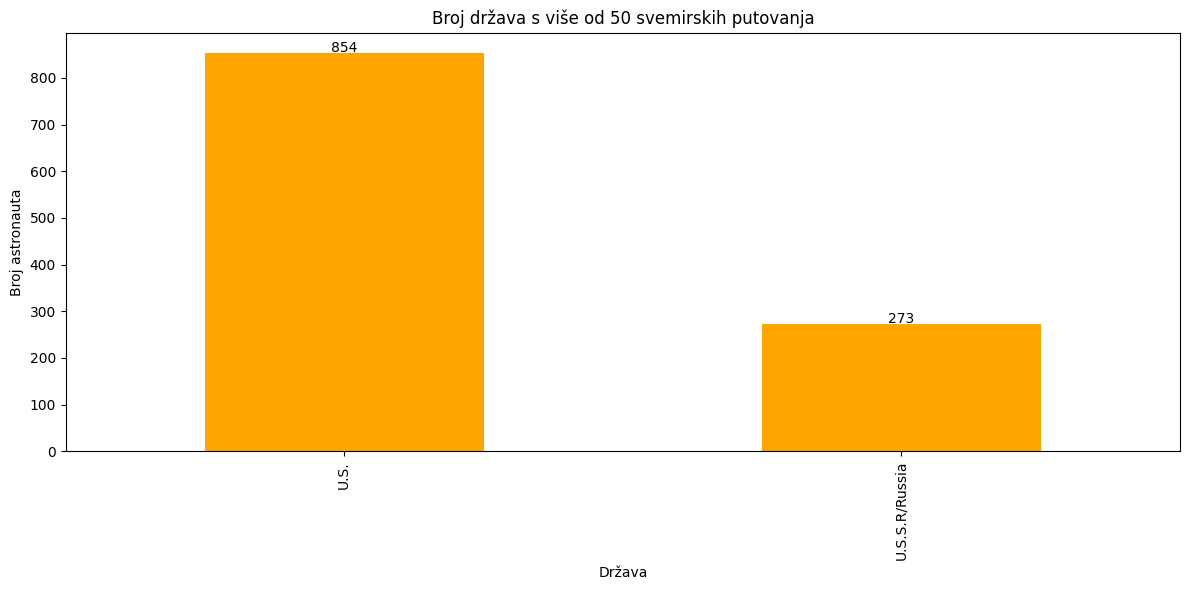

In [ ]:
broj_putovanja_po_drzavi = df['nationality'].value_counts()

broj_putovanja_preko_50 = broj_putovanja_po_drzavi[broj_putovanja_po_drzavi > 50]

fig, ax = plt.subplots(figsize=(12, 6))
broj_putovanja_preko_50.plot(kind='bar', color='orange', ax=ax)

plt.title('Broj država s više od 50 svemirskih putovanja')
plt.xlabel('Država')
plt.ylabel('Broj astronauta')

for i, v in enumerate(broj_putovanja_preko_50):
    ax.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()


Gledajući dalje, također je interesantno za primjetiti kako samo dvije države imaju više od 50 astronauta. Zbog ovoga, najčešće se ove iste države koristiti za dalju analizu.

# Da li postoji veza između godine rođenja i dužine misije?

In [ ]:
df['occupation'] = df['occupation'].str.lower()

occupations = df['occupation'].unique()
occupation_to_number = {occupation: i for i, occupation in enumerate(occupations)}

df['occupation_number'] = df['occupation'].replace(occupation_to_number)


filtered_df = df[['occupation_number', 'year_of_birth', 'hours_mission', 'year_of_mission']]

fig = px.scatter_3d(filtered_df, x='occupation_number', y='year_of_birth', z='hours_mission', color='year_of_mission', color_discrete_sequence=['blue', 'pink'])

fig.show()


for occupation, number in occupation_to_number.items():
    print(f"{number}: {occupation}")

0: pilot
1: psp
2: commander
3: msp
4: flight engineer
5: other (journalist)
6: other (space tourist)
7: space tourist
8: spaceflight participant


Na temelju podataka s grafa, primjećuje se da mlađi astronauti u prosjeku provode više vremena u svemiru. Također, primjetan je trend da su ranije misije najčešće bile namijenjene pilotima, dok se u novijim misijama sve veći broj astronauta specijalizira kao inženjer leta ili zapovjednik.





In [ ]:
mean = df['hours_mission'].mean()

print(mean)

1050.883984338293


srednja vrijednost broja sati je 1050.8

#Razlika između spola osobe i broja misija

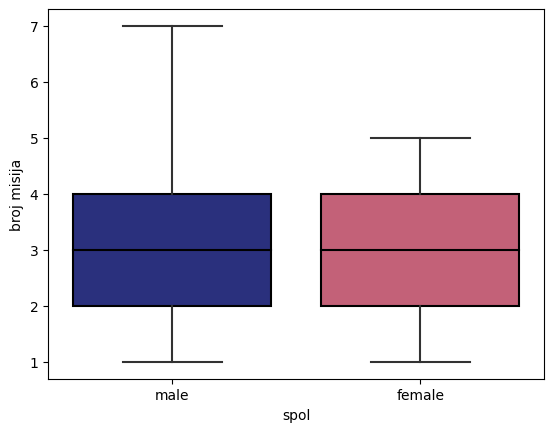

In [ ]:
sns.boxplot(data=df, x='sex', y='total_number_of_missions', palette={'male': '#1C248B', 'female': '#D35170'}, boxprops = dict(edgecolor='black'),  medianprops=dict(color='black'))
plt.xlabel('spol')
plt.ylabel('broj misija')

plt.show()

In [ ]:
mediani = df.groupby('sex')['total_number_of_missions'].median()

print(mediani)

sex
female    3.0
male      3.0
Name: total_number_of_missions, dtype: float64


- U prosjeku žene i muškarci su obavili isti broj misija, osim par izuzetaka.

# Posljednjih godina, astronauti su proveli više vremena u svemiru izvan postaje u odnosu na starije vrijeme

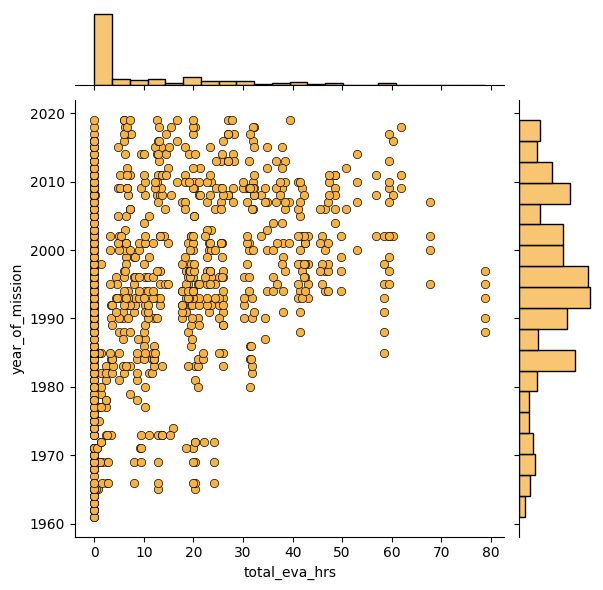

In [ ]:
sns.jointplot(x='total_eva_hrs', y='year_of_mission', data=df , color='#F6B243', joint_kws={'edgecolor': 'black'})

Ne možemo donijeti pouzdan zaključak da li postoji jasna veza, iako je primjetno da u “starijim“ godinama (1960) astronauti nisu proveli više od 30 sati van postaje

# Raspored država i broja misija tokom godina

Rasporedit ćemo boju na osnovu broja ponavljanja te države :

<ipython-input-109-4c3da92524d6>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



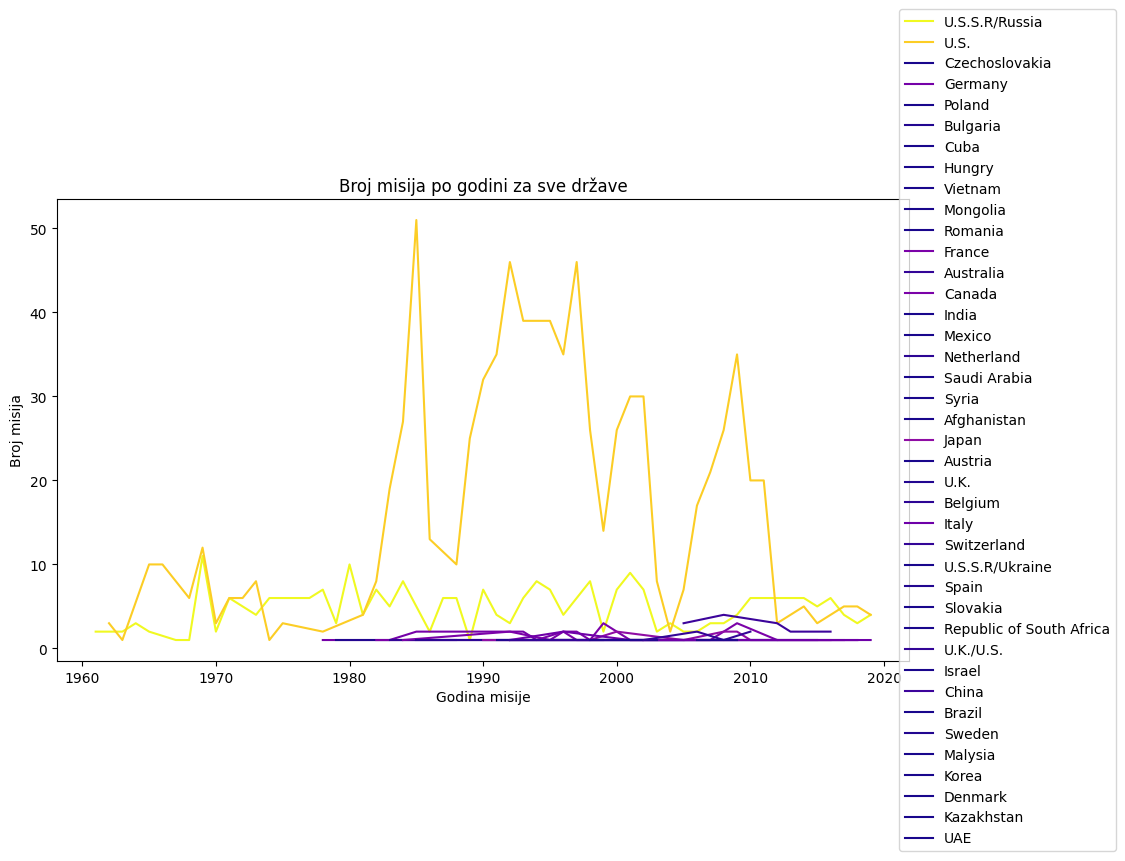

In [ ]:
grouped = df.groupby(['year_of_mission', 'nationality']).size().reset_index(name='num_missions')

counts = grouped['nationality'].value_counts()

cmap = cm.get_cmap('plasma')

unique_nations = grouped['nationality'].unique()
colors = cmap(counts[unique_nations] / counts.max())

palette = dict(zip(unique_nations, colors))

plt.figure(figsize=(11, 6))
sns.lineplot(data=grouped, x='year_of_mission', y='num_missions', hue='nationality', palette=palette)

plt.title('Broj misija po godini za sve države')
plt.xlabel('Godina misije')
plt.ylabel('Broj misija')

plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()





Vidimo da se prve dvije države najviše pojavljuju pa ćemo ih bliže promotriti

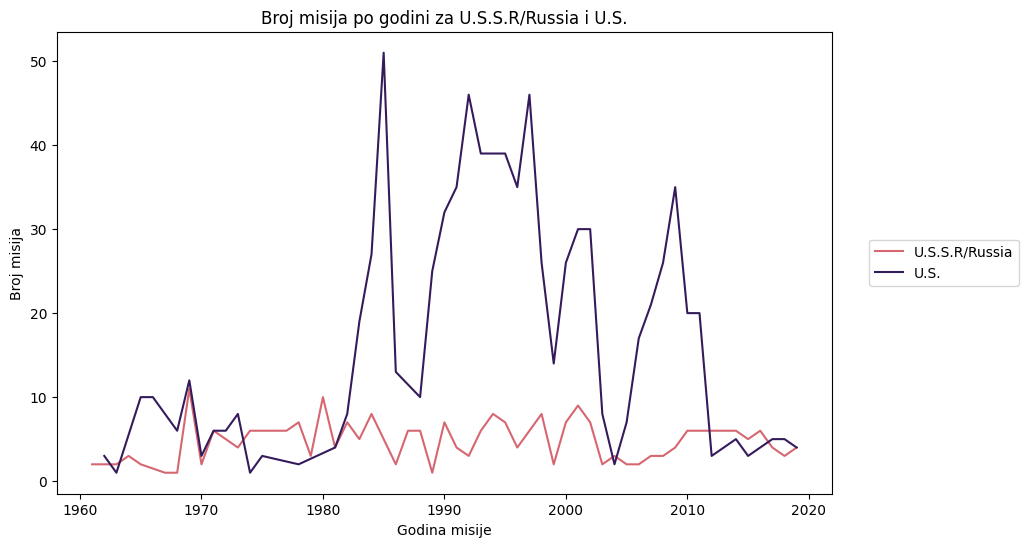

In [ ]:
df_filtered = df[df['nationality'].isin(['U.S.S.R/Russia', 'U.S.'])]

grouped = df_filtered.groupby(['year_of_mission', 'nationality']).size().reset_index(name='num_missions')

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='year_of_mission', y='num_missions', hue='nationality',
             palette={'U.S.S.R/Russia': '#D66771', 'U.S.': '#351B5C'})

plt.title('Broj misija po godini za U.S.S.R/Russia i U.S.')
plt.xlabel('Godina misije')
plt.ylabel('Broj misija')

plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()


Primjetno je da U.S. tokom godina imala veći broj misija

#Koji astronauti su proveli najviše sati u svemiru

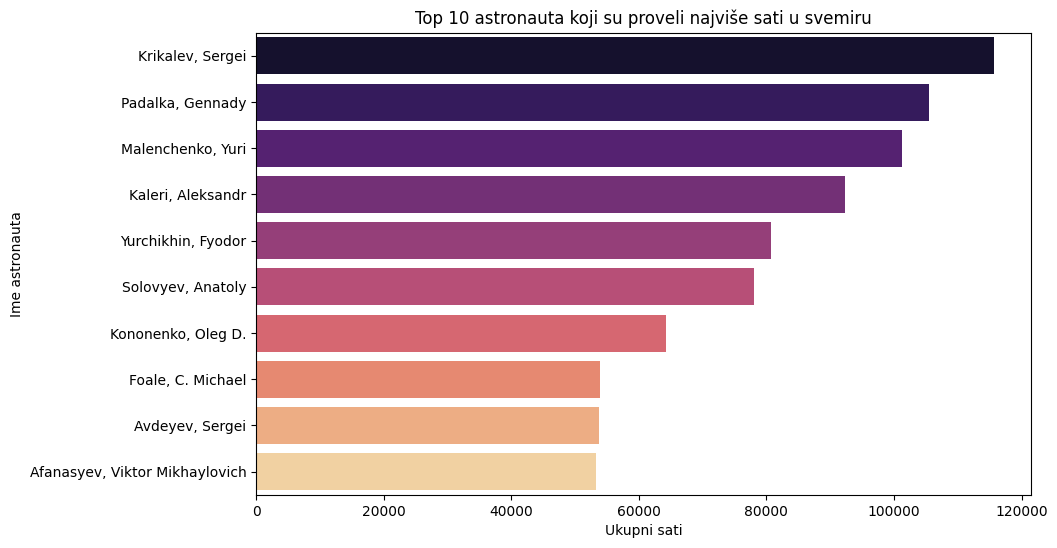

In [ ]:
grouped = df.groupby('name')['total_hrs_sum'].sum().sort_values(ascending=False)


top_10 = grouped.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10, y=top_10.index, orient='h', palette='magma')

plt.title('Top 10 astronauta koji su proveli najviše sati u svemiru')
plt.xlabel('Ukupni sati')
plt.ylabel('Ime astronauta')

plt.show()

#Astronauti koji su učestvovali najvećem broju misija

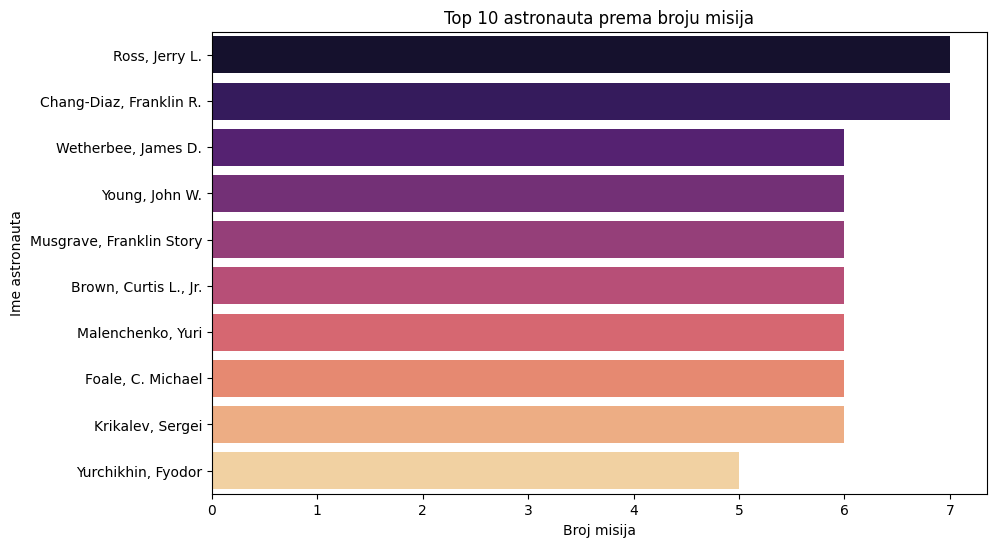

In [ ]:
grouped = df.groupby('name')['total_number_of_missions'].max()

top_10 = grouped.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10, y=top_10.index, orient='h', palette='magma')

plt.title('Top 10 astronauta prema broju misija')
plt.xlabel('Broj misija')
plt.ylabel('Ime astronauta')

plt.show()

#Koja misija ima najviše učesnika

In [ ]:
filtered_df = df.drop_duplicates(subset=['mission_title', 'name'])

grouped = filtered_df['mission_title'].value_counts()

t5 = grouped.head(5).index.tolist()

for mission_title in t5:
    print(mission_title)

Salyut 7
Salyut 6
24
2
20


Vidimo da misija “Salyut 7“ je imala najveći broj učesnika

#U kojoj godini je bio najveći broj misija?

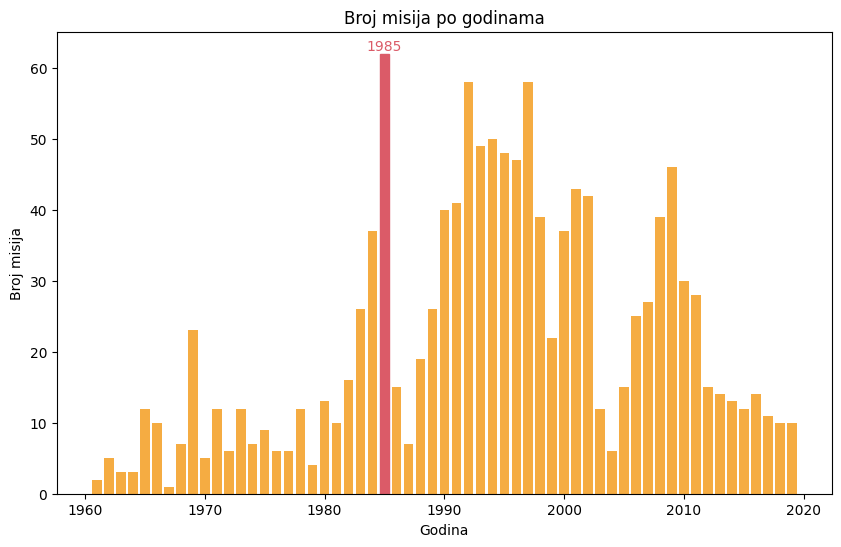

In [ ]:
misije_po_godini = df['year_of_mission'].value_counts()

najvise_misija_godina = misije_po_godini.idxmax()

plt.figure(figsize=(10, 6))

bars = plt.bar(misije_po_godini.index, misije_po_godini.values, color='#F5AC42')

for i, bar in enumerate(bars):
    if misije_po_godini.index[i] == najvise_misija_godina:
        bar.set_color('#DB5B68')

plt.xlabel('Godina')
plt.ylabel('Broj misija')
plt.title('Broj misija po godinama')

plt.text(najvise_misija_godina, misije_po_godini.max(), f'{najvise_misija_godina}',
         ha='center', va='bottom', color='#DB5B68')

plt.show()

Sa histograma vidimo da se u 1985 izvršio najveći broj misija

#Rakete i broj korištenja kroz godine

Zbog velikog broja korištenih raketa koje su se koristle samo jednom, izračunat ćemo i vizuelno predstaviti broj ponavljanja prvih 10 (po broju ponavljanja) raketa:

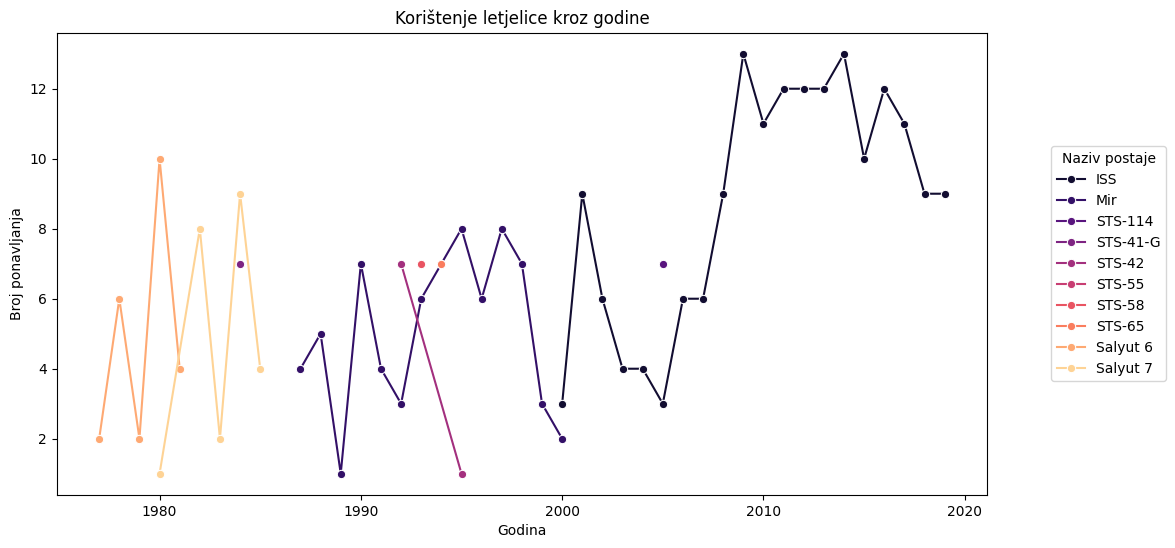

In [ ]:
grouped = df['in_orbit'].value_counts().head(10)

filtered_df = df[df['in_orbit'].isin(grouped.index)]

grouped_by_year = filtered_df.groupby(['year_of_mission', 'in_orbit']).size().unstack()

plt.figure(figsize=(12, 6))
cmap = sns.color_palette("magma", len(grouped_by_year.columns))
for i, column in enumerate(grouped_by_year.columns):
    if column in grouped.index:
        sns.lineplot(data=grouped_by_year[column], marker='o', label=column, color=cmap[i])
    else:
        sns.lineplot(data=grouped_by_year[column], marker='o', color='grey')

plt.xlabel('Godina')
plt.ylabel('Broj ponavljanja')
plt.title('Korištenje letjelice kroz godine')
plt.legend(title='Naziv postaje', loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.show()

Vidimo da se najčešće i najviše koristila postaja ISS

#Koliki postotak astronauta je mijenjao letjelicu

In [ ]:
astronauti_nije = df[df['ascend_shuttle'] == df['descend_shuttle']]['name'].nunique()

astronauti_dva = df[df['ascend_shuttle'] != df['descend_shuttle']]['name'].value_counts().eq(2).sum()

astronauti_tri = df[df['ascend_shuttle'] != df['descend_shuttle']]['name'].value_counts().eq(3).sum()

ukupno_astronauta = df['name'].nunique()

postotak_nije = (astronauti_nije / ukupno_astronauta) * 100

postotak_dva = (astronauti_dva / ukupno_astronauta) * 100

postotak_tri = (astronauti_tri / ukupno_astronauta) * 100

print(f"Postotak astronauta koji nisu mijenjali letjelicu: {postotak_nije:.2f}%")
print(f"Postotak astronauta koji su letjelicu promijenili dva puta: {postotak_dva:.2f}%")
print(f"Postotak astronauta koji su letjelicu promijenili tri puta: {postotak_tri:.2f}%")


Postotak astronauta koji nisu mijenjali letjelicu: 92.02%
Postotak astronauta koji su letjelicu promijenili dva puta: 3.19%
Postotak astronauta koji su letjelicu promijenili tri puta: 0.00%


# Kolika je vjerovatnoća da je astronaut Amerikanac ako ima najmanje 5 obavljenih misija?

In [ ]:
missions_by_nationality = df.groupby('nationality')['total_number_of_missions'].sum()

brojM = df['total_number_of_missions'].sum()

ocekivana = missions_by_nationality / brojM

nac = 'U.S.'

br = 5

n = brojM
p = ocekivana[nac]

probability = 1 - binom.cdf(br - 1, n, p)

print(f'Vjerojatnoća da je astronaut Amerikanac ako je broj misija jednak ili veći od 5: {probability}')

Vjerojatnoća da je astronaut Amerikanac ako je broj misija jednak ili veći od 5: 1.0


Svi Amerikanci su obavili minimum 5 misija.

# Normalna distribucija

Prvo ćemo ispitati normalnu distribuciju godine rođenja i misija astronuata:

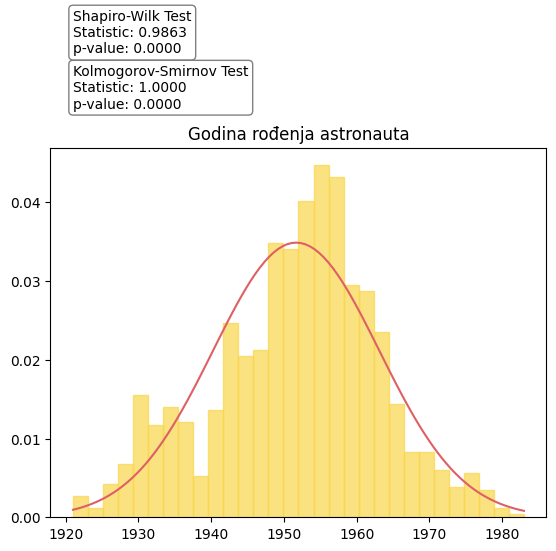

In [ ]:
data = df["year_of_birth"]
plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')
plt.text(data.min(), 0.052, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
shapiro_stat, shapiro_p_value = stats.shapiro(data)

plt.text(data.min(), 0.059, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
plt.title('Godina rođenja astronauta')
plt.show()

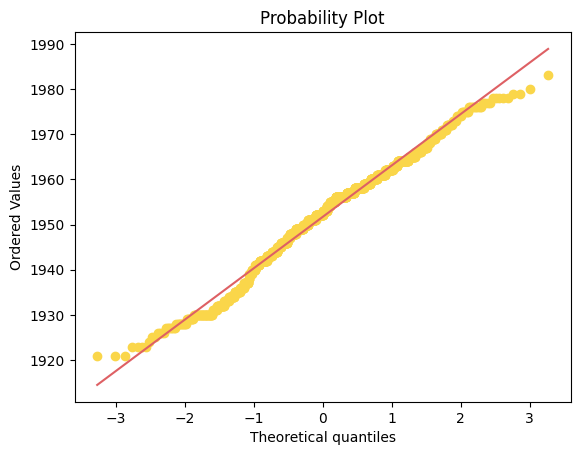

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['year_of_birth'], dist="norm", plot=ax)

points = ax.lines[0]
line = ax.lines[1]

points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')

line.set_color('#DE6064')

plt.show()


Možemo zaključiti da godine rođenja astronauta ne prate normalnu distribuciju ali su veoma blizu nje

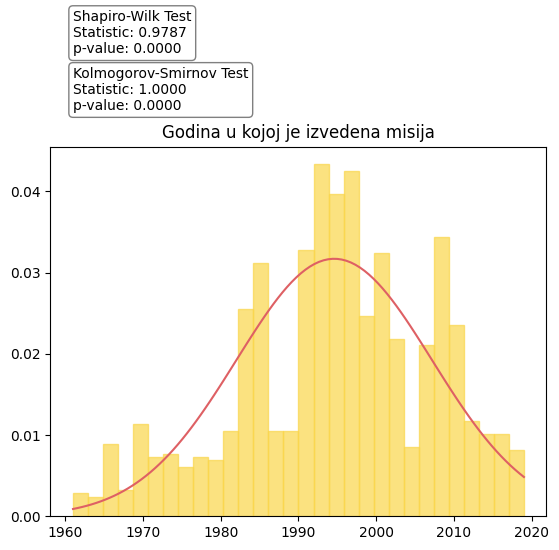

In [ ]:
data = df["year_of_mission"]

plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')


plt.text(data.min(), 0.05, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))


shapiro_stat, shapiro_p_value = stats.shapiro(data)

plt.text(data.min(), 0.057, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
plt.title('Godina u kojoj je izvedena misija')
plt.show()

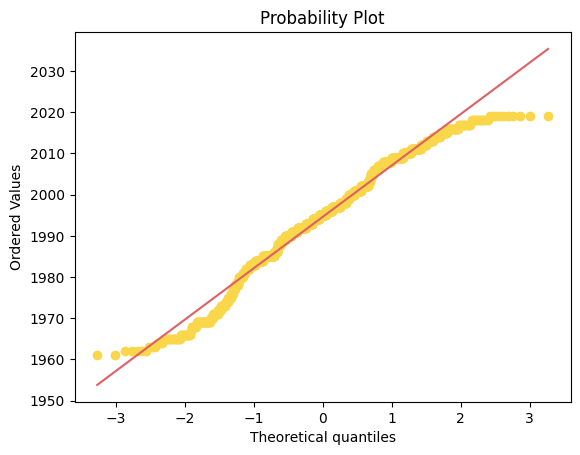

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['year_of_mission'], dist="norm", plot=ax)

points = ax.lines[0]
line = ax.lines[1]

points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')

line.set_color('#DE6064')

plt.show()


Varijable koje su korištene za analizu svemirskih misija ne prate potpuno normalnu distribuciju, ali su vrlo blizu prikaza iste. Unatoč tome, primjećuje se nagli porast broja misija u razdoblju od 1990. do 2000. godine. Taj porast može se objasniti smanjenjem političkih i ideoloških napetosti nakon Hladnog rata, što je otvorilo put za povećanu suradnju među zemljama.(treba napomenuti da je prema prethodnoj analizi najveći broj misija zapravo izveden 1985. godine tijekom Hladnog rata, kada je trka za političkim i ideološkim prestižem i dalje bila izražena, što se očituje i u analizi zemalja koje su provodile misije.)

Sada ispitujemo trajanja misije

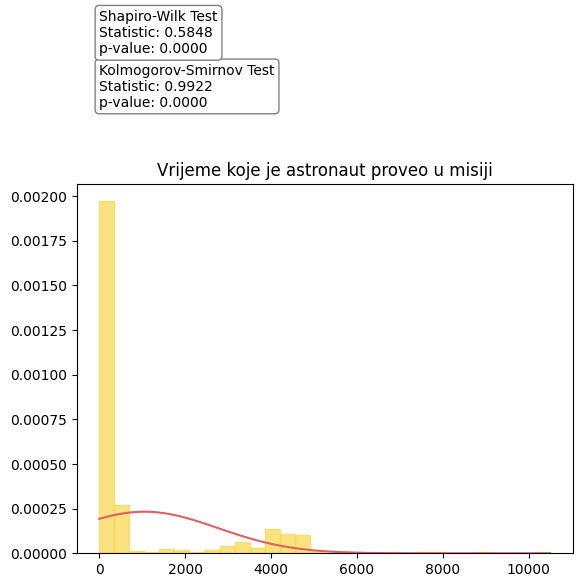

In [ ]:
data = df["hours_mission"]

plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')

plt.text(data.min(), 0.0025, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
shapiro_stat, shapiro_p_value = stats.shapiro(data)

plt.text(data.min(), 0.0028, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))


plt.title('Vrijeme koje je astronaut proveo u misiji')
plt.show()

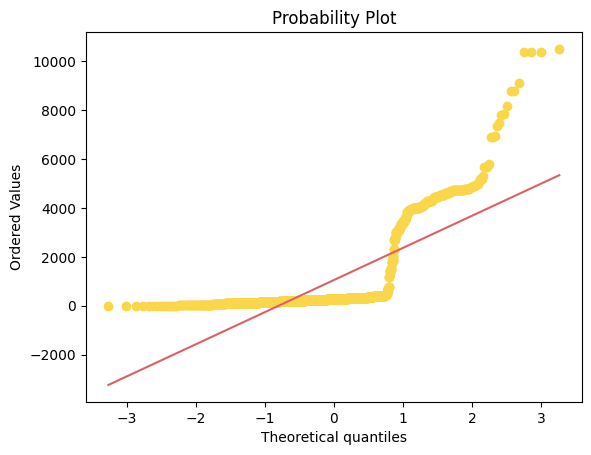

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['hours_mission'], dist="norm", plot=ax)

points = ax.lines[0]
line = ax.lines[1]

points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')

line.set_color('#DE6064')

plt.show()


Trajanje misije nikako ne prati normalnu distribuciju ali grafik normalne distribucije podsjeća na log-normalnu. Zbog toga ćemo putem sljedećeg koda ispitati da li sati misije prate log-normalnu distribuciju:

In [ ]:
data = df['hours_mission']

kstest_result = kstest(data, lognorm.fit(data))

if kstest_result.pvalue > 0.05:
    print("Podaci slijede log-normalnu distribuciju.")
else:
    print("Podaci ne slijede log-normalnu distribuciju.")

Podaci slijede log-normalnu distribuciju.


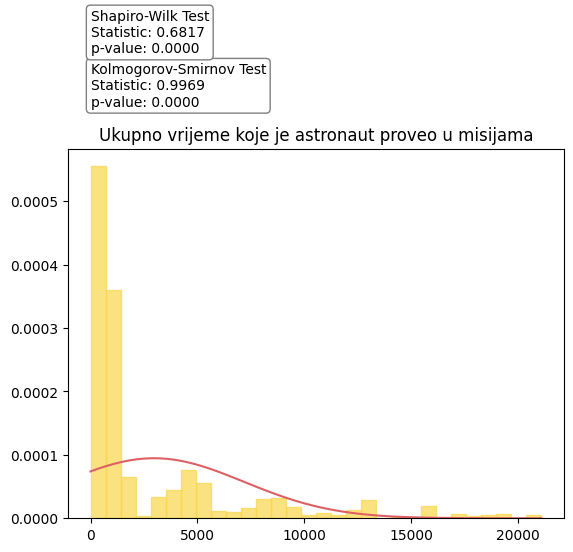

In [ ]:
data = df["total_hrs_sum"]

plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')


plt.text(data.min(), 0.00065, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

shapiro_stat, shapiro_p_value = stats.shapiro(data)


plt.text(data.min(), 0.000734, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))
plt.title('Ukupno vrijeme koje je astronaut proveo u misijama')
plt.show()

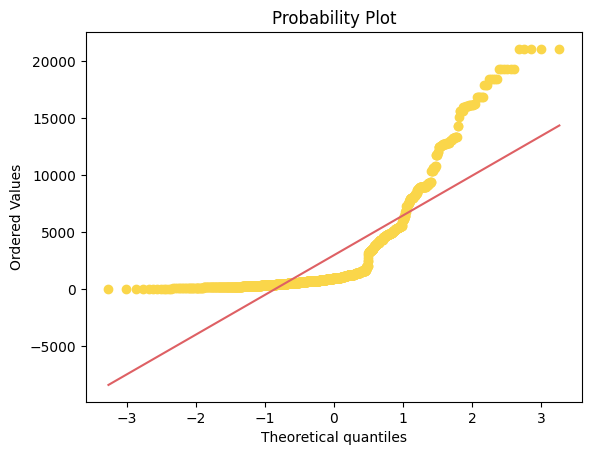

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['total_hrs_sum'], dist="norm", plot=ax)

points = ax.lines[0]
line = ax.lines[1]


points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')


line.set_color('#DE6064')

plt.show()


Ukupno trajanje misija također ne prati normalnu disribuciju, pa ćemo ispitati log-normalnu:

In [ ]:
data = df['hours_mission']

kstest_result = kstest(data, lognorm.fit(data))

if kstest_result.pvalue > 0.05:
    print("Podaci slijede log-normalnu distribuciju.")
else:
    print("Podaci ne slijede log-normalnu distribuciju.")

Podaci slijede log-normalnu distribuciju.


Za kraj ćemo ispitati i ponašanje vrijednosti za sate koje su astronauti proveli u svemiru van letjelice:

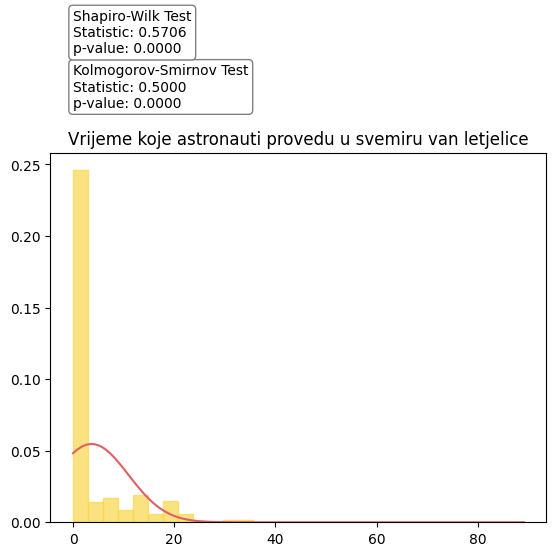

In [ ]:
data = df["eva_hrs_mission"]

plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')

plt.text(data.min(), 0.29, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

shapiro_stat, shapiro_p_value = stats.shapiro(data)


plt.text(data.min(), 0.328, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))


plt.title('Vrijeme koje astronauti provedu u svemiru van letjelice')
plt.show()

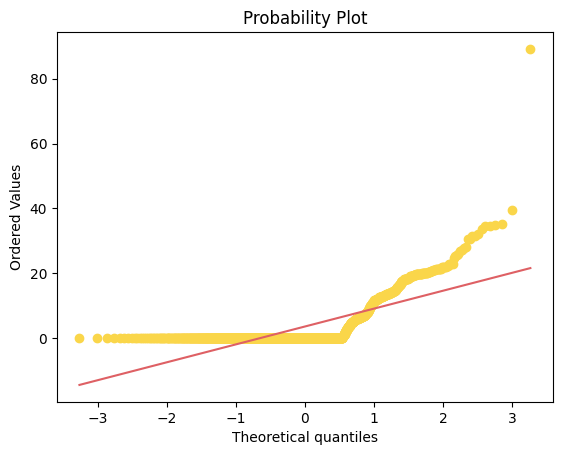

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['eva_hrs_mission'], dist="norm", plot=ax)


points = ax.lines[0]
line = ax.lines[1]


points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')


line.set_color('#DE6064')

plt.show()

Kao i za prethodne slučajeve, vrijednosti ne prate normalnu distribuciju ali zbog sličnosti sa log-normalnom ispitat ćemo sljedeće:

In [ ]:
data = df['eva_hrs_mission']

kstest_result = kstest(data, lognorm.fit(data))

if kstest_result.pvalue > 0.05:
    print("Podaci slijede log-normalnu distribuciju.")
else:
    print("Podaci ne slijede log-normalnu distribuciju.")

Podaci slijede log-normalnu distribuciju.


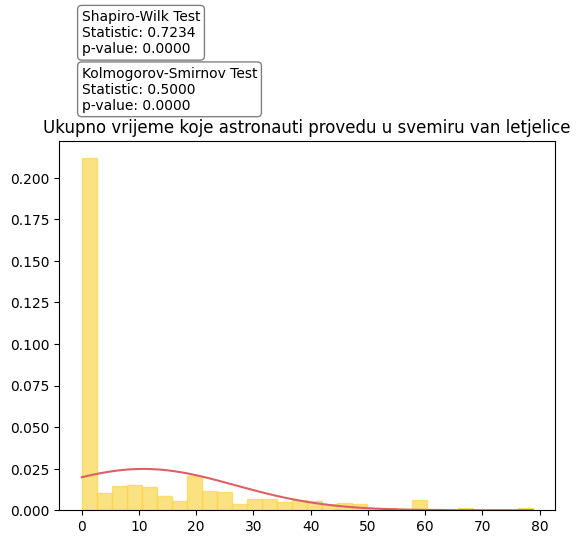

In [ ]:
data = df["total_eva_hrs"]

plt.hist(data, bins=30, density=True, alpha=0.7, color='#FAD64A', edgecolor='#FAD64A')

mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='#DE6064')

ks_stat, ks_p_value = stats.kstest(data, 'norm')

plt.text(data.min(), 0.241, f"Kolmogorov-Smirnov Test\nStatistic: {ks_stat:.4f}\np-value: {ks_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))


shapiro_stat, shapiro_p_value = stats.shapiro(data)

plt.text(data.min(), 0.275, f"Shapiro-Wilk Test\nStatistic: {shapiro_stat:.4f}\np-value: {shapiro_p_value:.4f}",
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

plt.title('Ukupno vrijeme koje astronauti provedu u svemiru van letjelice')
plt.show()

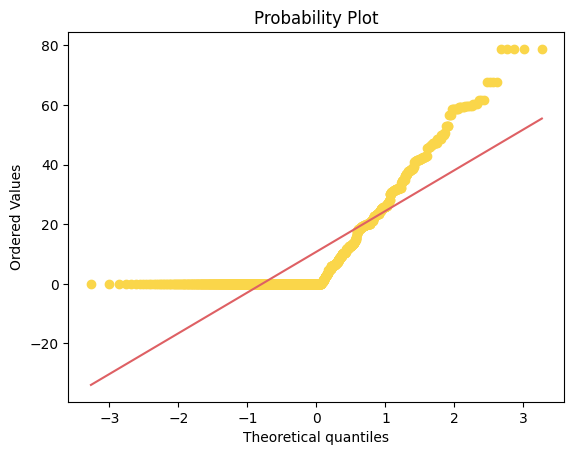

In [ ]:

fig, ax = plt.subplots()
stats.probplot(df['total_eva_hrs'], dist="norm", plot=ax)


points = ax.lines[0]
line = ax.lines[1]

points.set_markerfacecolor('#FAD64A')
points.set_markeredgecolor('#FAD64A')

line.set_color('#DE6064')

plt.show()


In [ ]:
data = df['total_eva_hrs']

kstest_result = kstest(data, lognorm.fit(data))

if kstest_result.pvalue > 0.05:
    print("Podaci slijede log-normalnu distribuciju.")
else:
    print("Podaci ne slijede log-normalnu distribuciju.")

Podaci slijede log-normalnu distribuciju.


Ni jedna numerička varijabla ne prati normalnu disribuciju

#Estimacija intervala pouzdanosti srednje vrijednosti

In [ ]:

numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

confidence_level = 0.95
exclude_vars = ['id', 'number', 'nationwide_number', 'field21', 'mission_number']
numeric_vars = [var for var in numeric_vars if var not in exclude_vars]
for var in numeric_vars:
    mean = np.mean(df[var])
    std_dev = np.std(df[var])
    degrees_freedom = len(df[var]) - 1
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean, std_dev)


    confidence_interval_rounded = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))

    print(f'Interval pouzdanosti za srednju vrijednost varijable {var} je: ', confidence_interval_rounded)


Interval pouzdanosti za srednju vrijednost varijable year_of_birth je:  (1929.26, 1974.11)
Interval pouzdanosti za srednju vrijednost varijable year_of_selection je:  (1961.63, 2009.55)
Interval pouzdanosti za srednju vrijednost varijable total_number_of_missions je:  (0.24, 5.73)
Interval pouzdanosti za srednju vrijednost varijable year_of_mission je:  (1969.92, 2019.27)
Interval pouzdanosti za srednju vrijednost varijable hours_mission je:  (-2311.92, 4413.69)
Interval pouzdanosti za srednju vrijednost varijable total_hrs_sum je:  (-5296.95, 11233.64)
Interval pouzdanosti za srednju vrijednost varijable eva_hrs_mission je:  (-10.63, 17.95)
Interval pouzdanosti za srednju vrijednost varijable total_eva_hrs je:  (-20.7, 42.23)
Interval pouzdanosti za srednju vrijednost varijable occupation_number je:  (-0.17, 4.94)


Na osnovu date analize, za varijable "Godina rodjenja", "Godina odabira", "Ukupan broj misija" i "Godina misije" mozemo odrediti estimaciju intervala pouzdanosti sa 95% tacnosti, medjutim za varijable "Broj sati misija", "Ukupan broj sati", "Broj sati izvan letjelice po misiji" i "Ukupan broj sati izvan letjelice" ne mozemo nista zakljuciti o intervalu pouzdanosti jer je donja granica negativna i to ukazuje na veliku varijabilnost u podacima.



#Test zavisnosti

#Raspodjela astronauta po timovima ne zavisi od njihove nacionalnosti

In [ ]:
contingency_table = pd.crosstab(df['nationality'], df['selection'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("test neovisnosti")
print(f"Chi-square statistika: {chi2_stat}")
print(f"P-vrijednost: {p_value}")

test neovisnosti
Chi-square statistika: 37153.65050126344
P-vrijednost: 0.0


- Ne postoji veza između nacionalnosti i timova tako da je hipoteza tacna

#Raspodjela astronauta po timovima ne zavisi od spola

H0: nema veze između raspodjele tima i spola

H1: postoji veza između raspodjele tima i spola

In [ ]:
contingency_table = pd.crosstab(df['sex'], df['selection'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("test neovisnosti")
print(f"Chi-square statistika: {chi2_stat}")
print(f"P-vrijednost: {p_value}")

test neovisnosti
Chi-square statistika: 315.1584053326969
P-vrijednost: 9.641947771727814e-05


Ovo ukazuje na postojanje značajne veze između spola i tima. Obzirom da se javlja veza možemo vizuelno predstaviti koristeći chi-squared distribuciju:

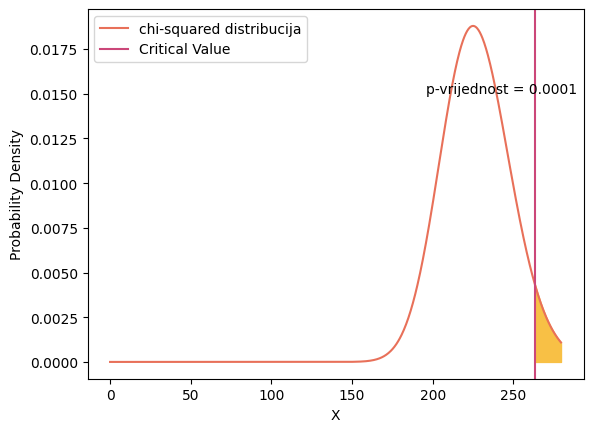

Chi-square statistika: 315.1584053326969
P-vrijednost: 9.641947771727814e-05
Stepeni slobode: 227
Kritična vrijednost: 263.1470227203289
Odbacujemo null hipotezu. Postoji veza


In [ ]:
spol = df['sex']
selection = df['selection']

observed_values = pd.crosstab(spol, selection)

chi2_stat, p_value, dof, expected_freq = chi2_contingency(observed_values)

degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 1000)

pdf = chi2.pdf(x, degrees_of_freedom )

plt.plot(x, pdf, '#E87059', label='chi-squared distribucija')

critical_value = chi2.ppf(0.95, degrees_of_freedom) #alfa=0.05
plt.fill_between(x[x > critical_value], pdf[x > critical_value], color='#F8C045')


plt.axvline(x=critical_value, color='#CB4779', linestyle='-', label='Critical Value')


plt.text(0.7 * chi2.ppf(0.99, degrees_of_freedom), 0.8 * np.max(pdf), f'p-vrijednost = {p_value:.4f}', color='black')


plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

print("Chi-square statistika:", chi2_stat)
print("P-vrijednost:", p_value)
print("Stepeni slobode:", degrees_of_freedom)
print("Kritična vrijednost:", critical_value)
if chi2_stat > critical_value:
    print("Odbacujemo null hipotezu. Postoji veza")
else:
    print("Ne odbacujemo null hipotezu. Veza ne postoji")

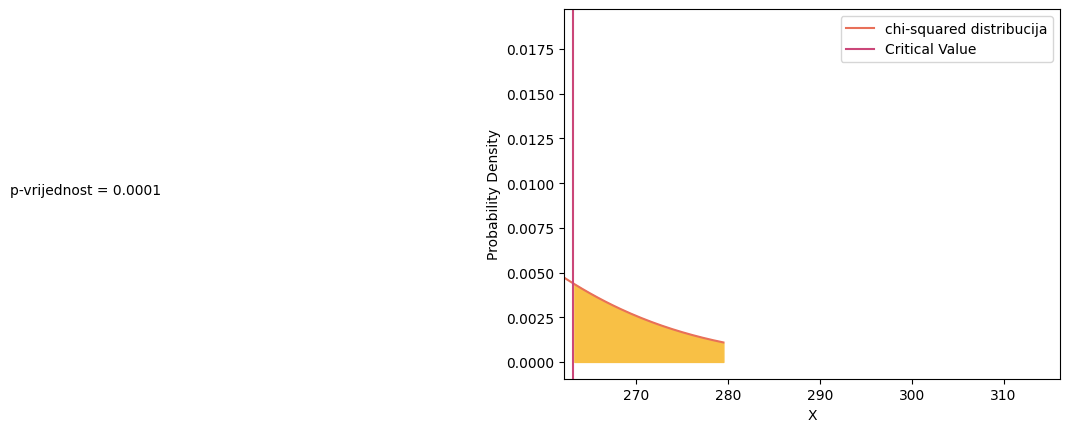

In [ ]:
spol = df['sex']
selection = df['selection']

observed_values = pd.crosstab(spol, selection)

chi2_stat, p_value, _, _ = chi2_contingency(observed_values)

degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 1000)

pdf = chi2.pdf(x, degrees_of_freedom)

plt.plot(x, pdf, '#E87059', label='chi-squared distribucija')

critical_value = chi2.ppf(0.95, degrees_of_freedom)
plt.fill_between(x[x > critical_value], pdf[x > critical_value], color='#F8C045')

plt.axvline(x=critical_value, color='#CB4779', linestyle='-', label='Critical Value')

plt.text(0.8 * chi2.ppf(0.88, degrees_of_freedom), 0.5 * np.max(pdf), f'p-vrijednost = {p_value:.4f}', color='black')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.xlim(critical_value - 1, chi2_stat + 1)

plt.show()


Hipoteza je opovrgnuta jer smo dobili rezultate koji su suprotni od onoga što smo očekivali.

#Muškarci se zapošljavaju mlađi

H0: ne postoji veza između godine rođenja i spola

H1: postoji veza između godine rođenja i spola

Prvo ćemo ispitati da li postoji veza između spola i godine rođenja astronauta:

In [ ]:
contingency_table = pd.crosstab(df['sex'], df['year_of_birth'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("test neovisnosti")
print(f"Chi-square statistika: {chi2_stat}")
print(f"P-vrijednost: {p_value}")

test neovisnosti
Chi-square statistika: 148.51727192690424
P-vrijednost: 1.1414961500280524e-09


Uradit ćemo chi-square distribuciju radi vizualizacije:

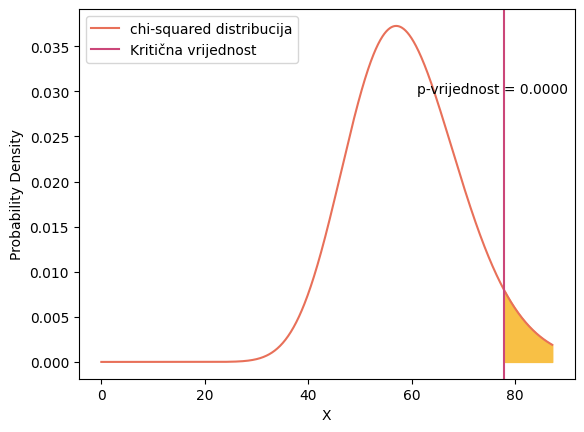

Chi-square statistika: 148.51727192690424
P-vrijednost: 1.1414961500280524e-09
Stepeni slobode: 59
Kritična vrijednost: 77.93052380523042
Odbacujemo null hipotezu. Postoji veza


In [ ]:
spol = df['sex']
godina = df['year_of_birth']

observed_values = pd.crosstab(spol, godina)

chi2_stat, p_value, _, _ = chi2_contingency(observed_values)

degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 1000)

pdf = chi2.pdf(x, degrees_of_freedom)

plt.plot(x, pdf, '#E87059', label='chi-squared distribucija')

critical_value = chi2.ppf(0.95, degrees_of_freedom)
plt.fill_between(x[x > critical_value], pdf[x > critical_value], color='#F8C045')

plt.axvline(x=critical_value, color='#CB4779', linestyle='-', label='Kritična vrijednost')

plt.text(0.7 * chi2.ppf(0.99, degrees_of_freedom), 0.8 * np.max(pdf), f'p-vrijednost = {p_value:.4f}', color='black')


plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

print("Chi-square statistika:", chi2_stat)
print("P-vrijednost:", p_value)
print("Stepeni slobode:", degrees_of_freedom)
print("Kritična vrijednost:", critical_value)
if chi2_stat > critical_value:
    print("Odbacujemo null hipotezu. Postoji veza")
else:
    print("Ne odbacujemo null hipotezu. Veza ne postoji")

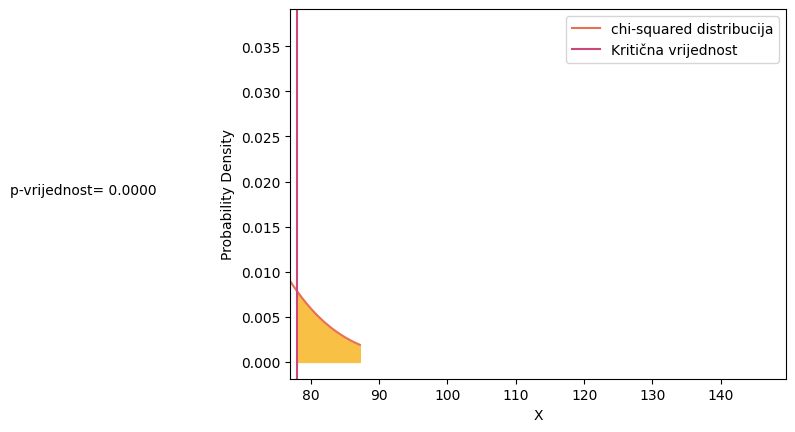

In [ ]:
spol = df['sex']
godina = df['year_of_birth']

observed_values = pd.crosstab(spol, godina)

chi2_stat, p_value, _, _ = chi2_contingency(observed_values)

degrees_of_freedom = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1)

x = np.linspace(0, chi2.ppf(0.99, degrees_of_freedom), 1000)

pdf = chi2.pdf(x, degrees_of_freedom)

plt.plot(x, pdf, '#E87059', label='chi-squared distribucija')

critical_value = chi2.ppf(0.95, degrees_of_freedom)
plt.fill_between(x[x > critical_value], pdf[x > critical_value], color='#F8C045')


plt.axvline(x=critical_value, color='#CB4779', linestyle='-', label='Kritična vrijednost')

plt.text(0.5 * chi2.ppf(0.88, degrees_of_freedom), 0.5 * np.max(pdf), f'p-vrijednost= {p_value:.4f}', color='black')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.xlim(critical_value - 1, chi2_stat + 1)

plt.show()

Kada smo dokazali zavisnost između dvije varijable ispitat ćemo srednje godine muškaraca i žena:

In [ ]:
male= df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

mean_male = male['year_of_birth'].mean()
mean_female = female['year_of_birth'].mean()

print("Srednja vrednost godina rođenja - Muškarci:", mean_male)
print("Srednja vrednost godina rođenja - Žene:", mean_female)


Srednja vrednost godina rođenja - Muškarci: 1950.92151675485
Srednja vrednost godina rođenja - Žene: 1957.7272727272727


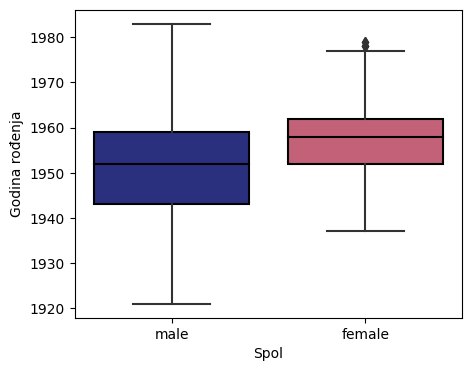

In [ ]:
plt.figure(figsize=(5, 4))

sns.boxplot(data=df, x='sex', y='year_of_birth', palette={'male': '#1C248B', 'female': '#D35170'},
            boxprops=dict(edgecolor='black'), medianprops=dict(color='black'))

plt.xlabel('Spol')
plt.ylabel('Godina rođenja')

plt.show()


Ovime možemo potvrditi početnu hipotezu, ali moramo uzeti u obzir da u našem uzorku ima manje žena od muškaraca:

In [ ]:
gender_counts = df['sex'].value_counts()

print(gender_counts)

male      1134
female     143
Name: sex, dtype: int64


#Estimacija intervala pouzdanosti proporcije

In [ ]:
male_count = len(df[df['sex'] == 'male'])
female_count = len(df[df['sex'] == 'female'])
total_count = len(df)

male_ci = smp.proportion_confint(male_count, total_count)

female_ci = smp.proportion_confint(female_count, total_count)

print(f"Interval pouzdanosti za proporciju muškaraca: {male_ci}")
print(f"Interval pouzdanosti za proporciju žena: {female_ci}")


Interval pouzdanosti za proporciju muškaraca: (0.8707231678257877, 0.9053144202713149)
Interval pouzdanosti za proporciju žena: (0.09468557972868512, 0.1292768321742123)



Na osnovu intervala pouzdanosti koje smo izračunali, možemo donijeti sljedeće zaključke:

 Interval pouzdanosti ukazuje da se prava proporcija muškaraca u populaciji od koje smo uzeli uzorak, sa 95% sigurnosti, nalazi između 87.07% i 90.53%. Ovo sugeriše da je većina osoba u našem uzorku, a vjerovatno i u cjelokupnoj populaciji, muškog spola.

Interval pouzdanosti za proporciju žena pokazuje da se stvarna proporcija žena u istoj populaciji, sa 95% sigurnosti, kreće između 9.47% i 12.93%. Ovo sugeriše da su žene značajno manje zastupljene u našem uzorku i vjerovatno u cjelokupnoj populaciji.

In [ ]:
military_count = len(df[df['military_civilian'] == 'military'])
total_count = len(df)

prop_military = military_count / total_count

ci_low, ci_upp = smp.proportion_confint(military_count, total_count, alpha=0.05)

print(f"Interval pouzdanosti za proporciju vojnih osoba: ({ci_low}, {ci_upp})")

civilian_count = len(df[df['military_civilian'] == 'civilian'])
prop_civilian = civilian_count / total_count

ci_low, ci_upp = smp.proportion_confint(civilian_count, total_count, alpha=0.05)

print(f"Interval pouzdanosti za proporciju civilnih osoba: ({ci_low}, {ci_upp})")


Interval pouzdanosti za proporciju vojnih osoba: (0.5753480492548446, 0.6290372287404569)
Interval pouzdanosti za proporciju civilnih osoba: (0.37096277125954313, 0.4246519507451554)



Na osnovu izračunatih intervala pouzdanosti, možemo izvesti sljedeće zaključke:

U pogledu vojnog osoblja, sa 95% pouzdanosti možemo tvrditi da se prava proporcija vojnih osoba u cjelokupnoj populaciji astronauta nalazi između 57.5% i 62.9%. Ovo ukazuje na to da veliki dio astronauta ima vojnu pozadinu.

Kada se radi o civilnim osobama, sa istim nivoom pouzdanosti, procjenjujemo da se prava proporcija civilnih osoba među astronautima nalazi između 37.1% i 42.5%.

In [ ]:
nationality_counts = df['nationality'].value_counts()

top_nationalities = nationality_counts[:2].index

df['nationality_group'] = df['nationality'].where(df['nationality'].isin(top_nationalities), 'Ostalo')

total_count = len(df)

for group in df['nationality_group'].unique():
    group_count = len(df[df['nationality_group'] == group])
    conf_int = prop.proportion_confint(group_count, total_count, alpha=0.05)
    conf_int_rounded = [round(val, 2) for val in conf_int]
    print(f"Interval pouzdanosti za proporciju astronauta iz grupe {group}: {conf_int_rounded}")



Interval pouzdanosti za proporciju astronauta iz grupe U.S.S.R/Russia: [0.19, 0.24]
Interval pouzdanosti za proporciju astronauta iz grupe U.S.: [0.64, 0.69]
Interval pouzdanosti za proporciju astronauta iz grupe Ostalo: [0.1, 0.14]



Na temelju analize intervala pouzdanosti za postotke astronauta prema nacionalnim grupama, možemo izvući sljedeće zaključke:

U.S.S.R/Rusija ima značajnu zastupljenost među astronautima, s postotkom koji se kreće između 19% i 24% s 95% pouzdanošću. To ukazuje na to da je U.S.S.R/Rusija bila važna sila u svemirskim istraživanjima i ima značajan doprinos u astronautici.

SAD također ima visoku zastupljenost među astronautima, s postotkom između 64% i 69% s 95% pouzdanošću. To potvrđuje da su Sjedinjene Američke Države igrale ključnu ulogu u istraživanju svemira i imaju veliki postotak astronauta u usporedbi s drugim nacionalnostima.

Ostale nacionalnosti, koje su grupirane pod nazivom "Ostalo", imaju nižu zastupljenost među astronautima. Interval pouzdanosti za tu grupu iznosi od 10% do 14% s 95% pouzdanošću. Ovo ukazuje na to da je postotak astronauta iz drugih nacionalnosti relativno manji u usporedbi s U.S.S.R/Rusijom i SAD-om.


#Linearna regresija

Da bismo mogli napraviti model linearne regresije kojim bismo mogli napraviti validno predviđanje neke varijable, prvo moramo vidjeti kakva ograničenja želimo uzeti. Kako bismo imali valjanu analizu, željeli bismo imati koeficijent determinacije koji je veći ili jednak vrijednosti od 0.5

Za našu analizu, htjeli smo izuzeti kolone koje su predstavljale godine, bilo to godina rođenja, godina misije i sl. (po preporuci).

In [ ]:
def find_best_linear_regression(data, columns_to_check):
    best_regressions = []

    for i in range(len(columns_to_check)):
        for j in range(i+1, len(columns_to_check)):
            column1 = columns_to_check[i]
            column2 = columns_to_check[j]

            x = data[[column1, column2]]
            y = data[column1].astype(float)

            if not np.issubdtype(x.dtypes.any(), np.number) or not np.issubdtype(y.dtype, np.number):
                continue

            regression_model = LinearRegression()

            try:
                regression_model.fit(x, y)
                y_pred = regression_model.predict(x)

                r_squared = regression_model.score(x, y)
                mse = mean_squared_error(y, y_pred)
                rmse = mean_squared_error(y, y_pred, squared=False)

                best_regressions.append((column1, column2, r_squared, mse, rmse))
            except ValueError:

                pass

    best_regressions.sort(key=lambda x: x[2], reverse=True)
    return best_regressions


data = pd.read_csv('vis-23/astronauts.csv', usecols=['total_number_of_missions', 'hours_mission', 'total_hrs_sum', 'eva_hrs_mission', 'total_eva_hrs'])

columns_to_check = ['total_number_of_missions', 'hours_mission', 'total_hrs_sum', 'eva_hrs_mission', 'total_eva_hrs']  # Specify the columns to check

best_regressions = find_best_linear_regression(data, columns_to_check)


r_squared_threshold = 0.5
mse_threshold = 100

print("Best Linear Regressions:")
if best_regressions:
    for regression in best_regressions:
        column1 = regression[0]
        column2 = regression[1]
        r_squared = regression[2]
        mse = regression[3]
        rmse = regression[4]

        if r_squared >= r_squared_threshold and mse <= mse_threshold:
            status = "performing well"
        else:
            status = "not performing well"

        print(f"Columns '{column1}' and '{column2}' have the best linear regression")
        print(f"R^2: {r_squared}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"Linear regression is {status}\n")
else:
    print("No linear regressions found.")

Best Linear Regressions:
No linear regressions found.


Kao što možemo vidjeti, nema niti jedna linearna regresija koja bi zadovoljila naša dva uslova.

Sve moguće linearne regresije koj proizilaze iz uslova da ne koristimo godine, nisu jasno čitljive, te nam nisu od koristi kako bismo mogli imati validno predviđanje

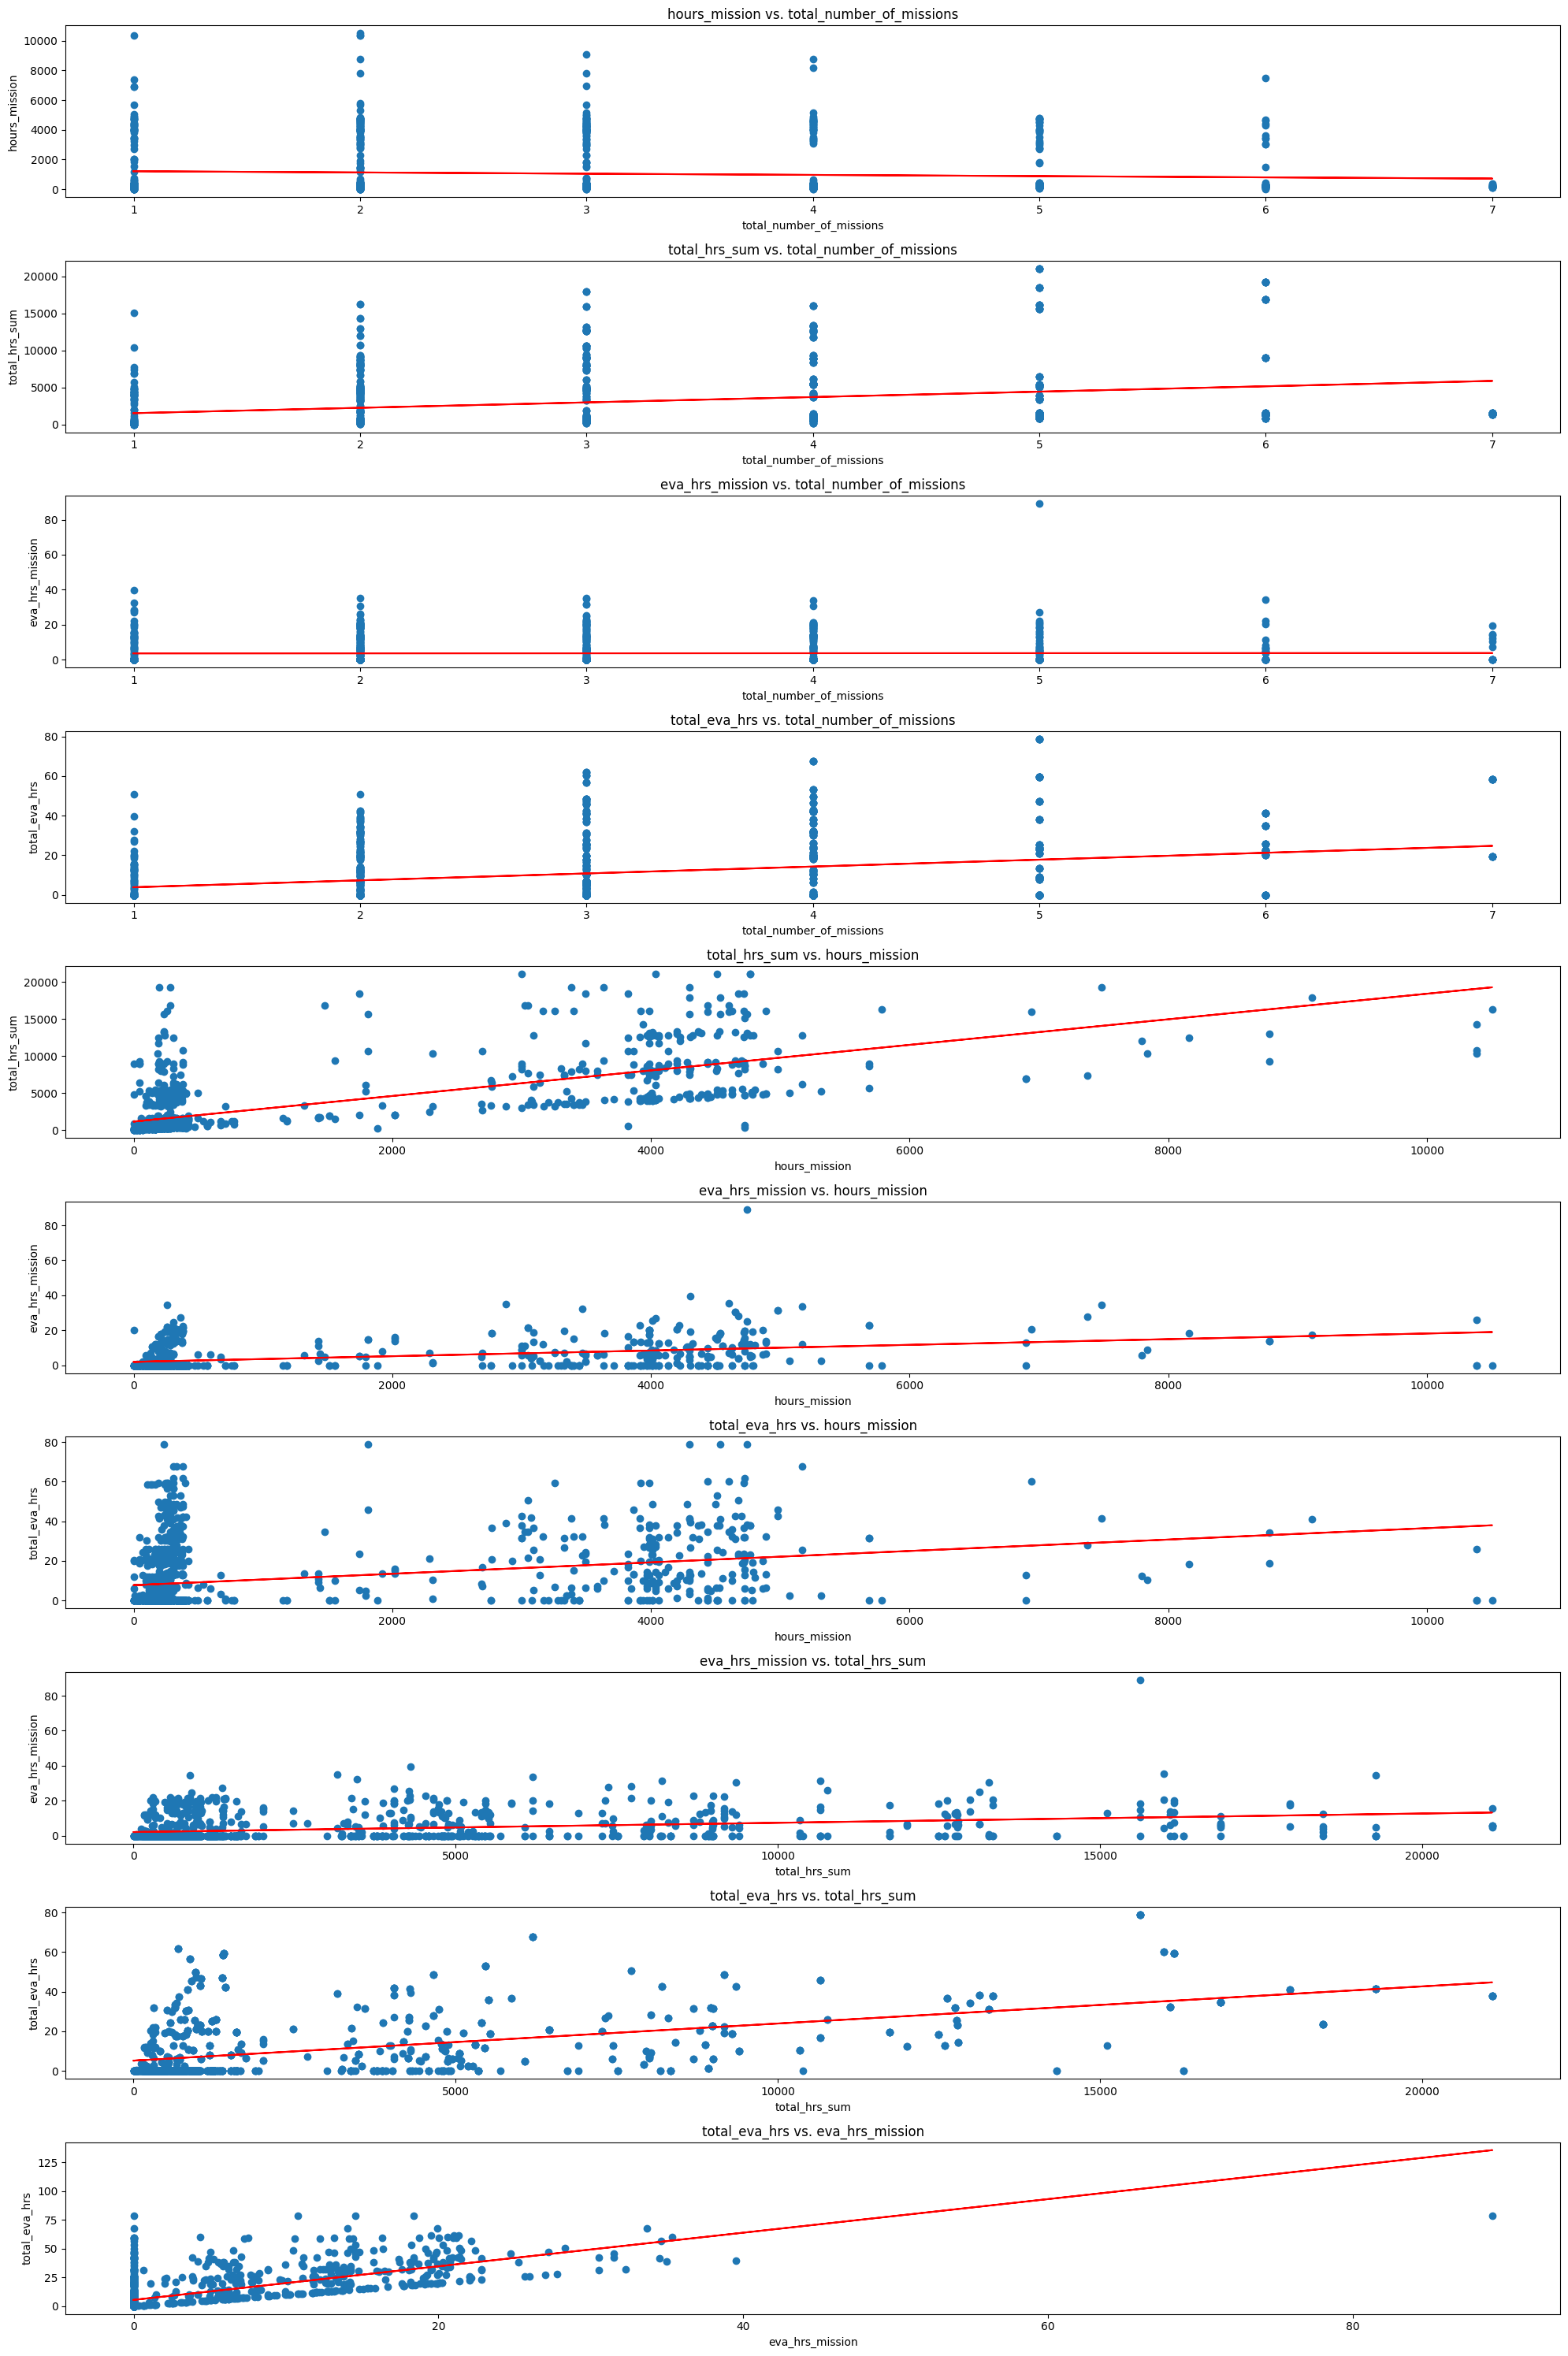

In [ ]:
selected_columns = ['total_number_of_missions', 'hours_mission', 'total_hrs_sum', 'eva_hrs_mission', 'total_eva_hrs']


num_plots = len(selected_columns) * (len(selected_columns) - 1) // 2
fig, axs = plt.subplots(num_plots, figsize=(20, 30))

plot_index = 0
for i, j in combinations(selected_columns, 2):
    X = df[i].values.reshape(-1, 1)
    y = df[j].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    ax = axs[plot_index]
    ax.scatter(X, y)
    ax.plot(X, y_pred, color='r')
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_title(f'{j} vs. {i}')

    plot_index += 1


plt.tight_layout()

plt.show()




---



No, ako uklonimo uslov da ne možemo koristiti godine, onda se javlja validna linearna regresija u formi nezavisne varijable 'year_of_selection' i zavisne varijable 'year_of_birth'

In [ ]:
def find_best_linear_regression(data, exclude_columns=[]):
    columns = data.columns.tolist()
    best_regressions = []

    for column_combo in combinations(columns, 2):
        if column_combo[0] in exclude_columns or column_combo[1] in exclude_columns:
            continue

        x = data[column_combo[0]]
        y = data[column_combo[1]]

        if not np.issubdtype(x.dtype, np.number) or not np.issubdtype(y.dtype, np.number):
            continue

        x = x.values.reshape(-1, 1)
        y = y.values

        regression_model = LinearRegression()
        regression_model.fit(x, y)
        y_pred = regression_model.predict(x)

        ss_total = ((y - y.mean())**2).sum()
        ss_residual = ((y - y_pred)**2).sum()
        r2_score = 1 - (ss_residual / ss_total)

        best_regressions.append((column_combo[0], column_combo[1], r2_score))

    best_regressions.sort(key=lambda x: x[2], reverse=True)
    return best_regressions


data = df
exclude_columns = ['id', 'field21', 'number']

best_regressions = find_best_linear_regression(data, exclude_columns)

print("Best Linear Regressions:")
if best_regressions:
    for regression in best_regressions:
        if regression[2] > 0.5:
            print(f"Columns '{regression[0]}' and '{regression[1]}' have the best linear regression (R^2 = {regression[2]})")
else:
    print("No linear regressions found.")


Best Linear Regressions:
Columns 'year_of_birth' and 'year_of_selection' have the best linear regression (R^2 = 0.8593267815976663)
Columns 'year_of_selection' and 'year_of_mission' have the best linear regression (R^2 = 0.8367453052338321)
Columns 'year_of_birth' and 'year_of_mission' have the best linear regression (R^2 = 0.7865860319525032)


Prvo ćemo je vizuelno predstaviti:

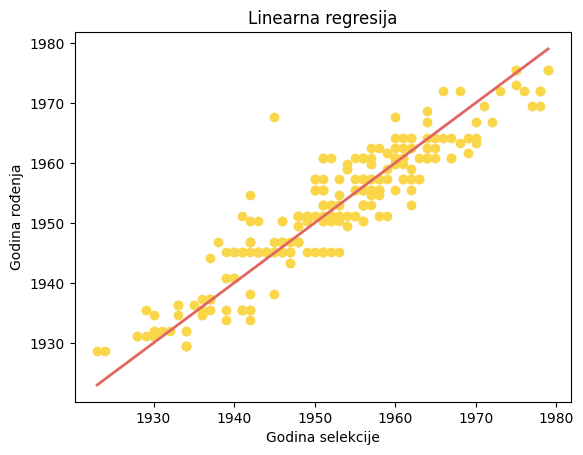

R-squared: 0.8637699894294067


In [ ]:
X = df['year_of_selection'].values.reshape(-1, 1)
y = df['year_of_birth']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



plt.scatter(y_test, y_pred, color='#FAD64A')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '#E16661', lw=2)
plt.xlabel('Godina selekcije')
plt.ylabel('Godina rođenja')
plt.title('Linearna regresija')

plt.show()


r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Obzirom da je R-squared vrijednost 0.8637, to ukazuje da se oko 86.37% varijabilnosti zavisne varijable može objasniti nezavisnim varijablama u modelu. To se smatra dobrim rezultatom za linearnu regresiju jer visoka vrijednost R-squared ukazuje na jaku linearnu vezu između nezavisnih i zavisne varijable. Dokazanu linearnu regresiju možemo iskoristiti da ispitamo da li se astronauti zapošljavaju sa “fiksnom“ vrijednosti godina:

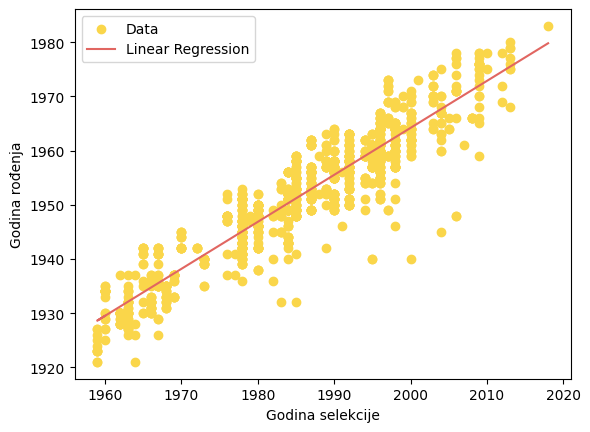

Dvije kolone prate linearnu regresiju.


In [ ]:
X = df[['year_of_selection']]
X = sm.add_constant(X)
y = df['year_of_birth']


model = sm.OLS(y, X)
results = model.fit()


plt.scatter(X['year_of_selection'], y, color='#FAD64A', label='Data')
plt.plot(X['year_of_selection'], results.predict(X), color='#E16661', label='Linear Regression')
plt.xlabel('Godina selekcije')
plt.ylabel('Godina rođenja')
plt.legend()
plt.show()


if results.pvalues[1] < 0.05:
    print("Dvije kolone prate linearnu regresiju.")
else:
    print("Dvije kolone ne prate linearnu regresiju.")



vidimo da postoji linearna regresija što ukazuje na to da postoji vrijednost koja predstavlja godine astronauta i koja vrijedi za većinu. U daljnjem kodu ćemo je izračunati:

In [ ]:
df['difference'] = df['year_of_selection'] - df['year_of_birth']
avg_razlika = df['difference'].mean()
print(avg_razlika)

33.905246671887234


Detaljnija računica:

In [ ]:

max = df['difference'].max()

min = df['difference'].min()

print(f"Najstariji: {max}")
print(f"Najmlađi: {min}")


Najstariji: 60
Najmlađi: 23


Vidimo da se pojavljuju vrijednosti koje se razlikuju od srednje vrijednosti, da bi utvrdili da li to vrijedi za većinu izračunat ćemo standardnu devijaciju:

In [ ]:
std_dev = df['difference'].std()
print(f"Standard deviation: {std_dev}")

Standard deviation: 4.58424578763578


Godine astronauta se kreću od 29 do 37, sada ćemo izračunat koliko njih se ne nalazi u tom rasponu:

In [ ]:
mean = 33
std_dev = 4.58

donja = mean - std_dev
gornja = mean + std_dev

ekstremi = df[(df['difference'] < donja) | (df['difference'] > gornja)]
ekstrem = len(ekstremi)

print(f"Broj ekstrema: {ekstrem}")

total = len(df)

postotak = ((total-ekstrem) / total) * 100

print(f"Postotak: {postotak}%")


Broj ekstrema: 384
Postotak: 69.92952231793265%


zaključak: Više od polovine astronauta je u 30-tim godinama tačnije 70% astronauta pripada rasponu od 29 do 37 godina.

#**HIPOTEZE**

#Hipoteza 1: Nema razlike u trajanju misije izmedju vojnih lica i civila. Two-Sample T-test (test za dvije srednje vrijednosti)

H0: Nema razlike u trajanju misije između vojnih osoba i civila.

H1: Postoji razlika u trajanju misije između vojnih osoba i civila.




In [ ]:
military = df[df['military_civilian'] == 'military']['hours_mission']
civilian = df[df['military_civilian'] == 'civilian']['hours_mission']

t_statistic, p_value = stats.ttest_ind(military, civilian)

print(f't-statistika: {t_statistic}, p-vrijednost: {p_value}')


t-statistika: -0.06940557268947807, p-vrijednost: 0.9446776766005995


Na osnovu rezultata t-testa, ne odbacujemo nultu hipotezu, što znači da ne možemo da zaključimo da postoji statistički značajna razlika u trajanju misije između vojnih osoba i civila.

#Hipoteza 2: Godina selekcije astronauata utječe na ukupan broj sati provedenih u svemiru. Two-Sample T-test (test za dvije srednje vrijednosti)

H0: Godina selekcije astronauata ne utječe na ukupan broj sati provedenih u svemiru.

H1: Godina selekcije astronauata utječe na ukupan broj sati provedenih u svemiru.

In [ ]:

year_of_selection = df['year_of_selection']
total_hrs_sum = df['total_hrs_sum']

t_statistic, p_value = stats.ttest_ind(year_of_selection, total_hrs_sum)

print(f"t-statistika: {t_statistic}")
print(f"p-vrijednost: {p_value}")


t-statistika: -8.332389637676329
p-vrijednost: 1.2767216211641616e-16


Odbijamo nultu hipotezu (H0). To znači da postoji statistički značajna veza između godine selekcije astronauata i ukupnog broja sati provedenih u svemiru.
S obzirom na to, prihvaćamo alternativnu hipotezu (H1) koja tvrdi da godina selekcije astronauata utječe na ukupan broj sati provedenih u svemiru.



#Hipoteza 3:  Postoji pozitivna veza između godine selekcije astronauta i broja misija (test za usporedbu srednjih vrijednosti dviju grupa)

H0: Godina selekcije astronauta nema utjecaj na broj misija.

H1: Godina selekcije astronauta ima pozitivan utjecaj na broj misija.

In [ ]:
data = pd.read_csv('vis-23/astronauts.csv')

grupa1 = data[data['year_of_selection'] < 2000]

grupa2 = data[data['year_of_selection'] >= 2000]

print("Grupa 1 - Astronauti selektirani prije 2000. godine:")
print(grupa1[['name', 'year_of_selection']])
print()

print("Grupa 2 - Astronauti selektirani nakon 2000. godine:")
print(grupa2[['name', 'year_of_selection']])

Grupa 1 - Astronauti selektirani prije 2000. godine:
                     name  year_of_selection
0           Gagarin, Yuri               1960
1          Titov, Gherman               1960
2     Glenn, John H., Jr.               1959
3     Glenn, John H., Jr.               1959
4     Carpenter, M. Scott               1959
...                   ...                ...
1215     Skripochka, Oleg               1997
1216     Skripochka, Oleg               1997
1217   Kondratyev, Dmitri               1997
1222    Furukawa, Satoshi               1999
1228        Revin, Sergei               1996

[1148 rows x 2 columns]

Grupa 2 - Astronauti selektirani nakon 2000. godine:
                          name  year_of_selection
998       Tito, Dennis Anthony               2000
1027  Shuttleworth, M. Richard               2001
1056               Yang, Liwei               2003
1066    Olsen, Gregory Hammond               2004
1067              Fei, Junlong               2005
...                        .

Ova podjela će nam omogućiti da provjerimo postoji li statistički značajna veza između godine selekcije i broja misija ili nekog drugog parametra.

In [ ]:

group1 = df[df['year_of_selection'] < 2000]['total_number_of_missions']

group2 = df[df['year_of_selection'] >= 2000]['total_number_of_missions']

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("p-vrijednost:", p_value)

p-vrijednost: 1.4224120362304179e-50


Na temelju rezultata t-testa za nezavisne uzorke, koji je dao nisku p-vrijednost, možemo odbaciti nultu hipotezu i prihvatiti alternativnu hipotezu. To znači da postoji statistički značajan pozitivan utjecaj godine selekcije astronauta na broj misija.

#Hipoteza 4: Postoji korelacija između ukupnog broja sati provedenih u svemiru i broja misija. (Testiranje statističke hipoteze)



H0: Nema korelacije između ukupnog broja sati provedenih u svemiru i broja misija.

H1: Postoji korelacija između ukupnog broja sati provedenih u svemiru i broja misija.

In [ ]:

total_hrs_sum = df['total_hrs_sum']
total_number_of_missions = df['total_number_of_missions']

t_statistic, p_value = ttest_ind(total_hrs_sum, total_number_of_missions)

print("t-statistika:", t_statistic)
print("p-vrijednost:", p_value)

t-statistika: 25.142266561714905
p-vrijednost: 8.160745909902576e-125



Budući da je p-vrijednost manja od razine značajnosti, odbijamo nultu hipotezu (H0) koja tvrdi da nema korelacije između ukupnog broja sati provedenih u svemiru i broja misija. S obzirom na dobivene rezultate, prihvaćamo alternativnu hipotezu (H1) koja tvrdi da postoji korelacija između ukupnog broja sati provedenih u svemiru i broja misija.